# Initialisation


In [ ]:
#Initialisation
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, KFold
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile
from  sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.feature_selection import SelectFromModel
import datetime
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
from IPython.display import display


In [ ]:
#Mettre à jour matplotlib
import matplotlib
!pip install matplotlib==3.5.3
#Mettre à jour matplotlib
#!pip install --upgrade matplotlib
#Check version si jamais les mises à jour sont perdues
matplotlib.__version__ #(Version doit être supérieure ou égale à 3.5.2)

In [ ]:
# Initialisation shap - Interprétabilité
!pip install shap

import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.9 MB/s 


In [ ]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
#Installation du drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lecture du df (version déjà nettoyée avec le code Creation-df.ipynb)
df=pd.read_csv("/content/drive/MyDrive/DataScientest/Pytmosphere/Data/df_pytmosphere.csv", index_col=0)


Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.


m          Enedc          Ewltp              W  \
count  551344.000000  551344.000000  551344.000000  551344.000000   
mean     1560.052098     140.525418     166.059859    2710.996550   
std       313.305561      37.370538      41.255001     227.244401   
min        83.000000       0.000000       4.000000       0.000000   
25%      1350.000000     117.000000     140.500020    2605.000000   
50%      1525.000000     135.000000     159.713799    2690.000000   
75%      1733.000000     157.000000     185.000000    2817.000000   
max      7731.000000     953.000000    1036.075628    5685.000000   

                 At1            At2             ec             ep  \
count  551344.000000  551344.000000  551344.000000  551344.000000   
mean     1572.378025    1561.378268    1844.471716     120.476832   
std       139.692975      83.693754     641.663799      55.310575   
min       460.000000     500.000000       1.000000     -11.249413   
25%      1533.000000    1527.000000    1461.000000      85.000000   
50%      1560.000000    1560.000000    1798.000000     110.000000   
75%      1589.000000    1587.000000    1995.000000     135.000000   
max      4325.000000    4903.000000    9592.000000    1103.000000   

             Ernedc        Erwltp            De           year      FuelCons  
count  47474.000000  23909.000000  10921.000000  551344.000000  30525.000000  
mean       1.863125      1.516638      0.010664    2015.558825      5.775632  
std        0.823492      0.510942      0.047744       3.436126      1.603143  
min        1.000000      0.500000     -0.970000    2010.000000      0.600000  
25%        1.200000      1.100000     -0.001000    2013.000000      4.900000  
50%        1.600000      1.600000      0.012000    2016.000000      5.500000  
75%        2.500000      1.900000      0.022000    2019.000000      6.400000  
max        6.400000      6.200000      2.390000    2021.000000     68.000000

Cn               0
Ct               0
m                0
Enedc            0
Ewltp            0
W                0
At1              0
At2              0
Ft               0
Fm               0
ec               0
ep               0
IT          479292
Ernedc      503870
Erwltp      527435
De          540423
Status           0
year             0
FuelCons    520819
grp              0
dtype: int64

Cn  Ct       m       Enedc  Ewltp       W     At1     At2  \
0        CAPTUR  M1  1322.0  141.285555  132.0  2639.0  1541.0  1554.0   
1      BERLINGO  M1  1505.0  111.000000  138.0  2785.0  1563.0  1567.0   
2      BERLINGO  M1  1595.0  158.148453  150.0  2975.0  1563.0  1577.0   
3       SANDERO  M1  1111.0  130.980451  121.0  2604.0  1526.0  1520.0   
4  X5 xDrive45e  M1  2510.0   40.000000   30.0  2975.0  1678.0  1698.0   

       Ft Fm      ec     ep         IT  Ernedc  Erwltp  De Status  year  \
0  petrol  M  1332.0  103.0        NaN     NaN     NaN NaN      P  2021   
1  diesel  M  1499.0   96.0      E2 29     NaN     0.7 NaN      P  2021   
2  diesel  M  1499.0   96.0        NaN     NaN     NaN NaN      P  2021   
3  petrol  M   999.0   49.0  e9  28 29     NaN     NaN NaN      P  2021   
4  hybrid  M  2998.0  210.0        NaN     NaN     NaN NaN      P  2021   

   FuelCons             grp  
0       5.8  RENAULT NISSAN  
1       NaN      STELLANTIS  
2       NaN      STELLANTIS  
3       5.4  RENAULT NISSAN  
4       NaN       BMW GROUP

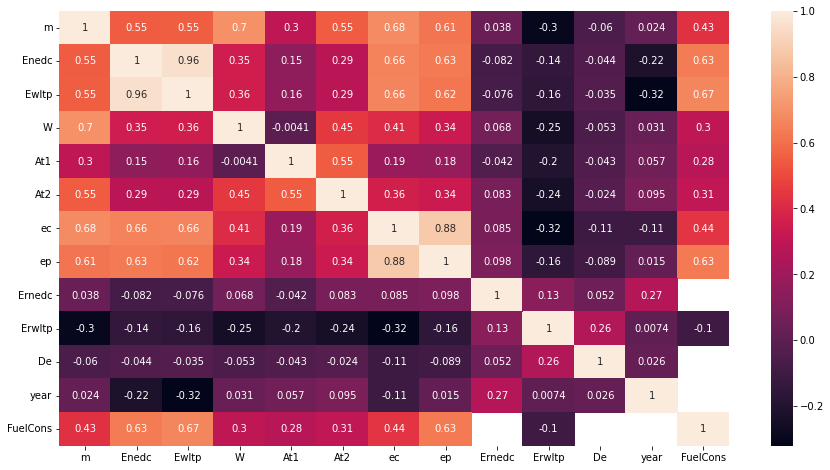

In [ ]:
# Description
display(df.describe())

# Valeurs manquantes ?
display(df.isna().sum())

# Matrice de corrélation
corr = df.corr()

#Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns);

# Affichage premières lignes
df.head()

# Visualisations

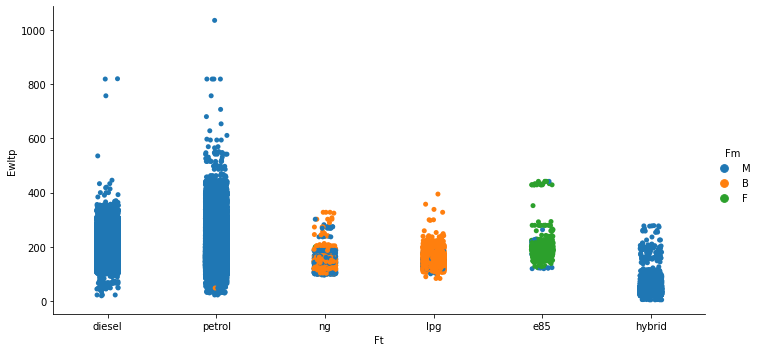

In [ ]:
sns.catplot(x='Ft', y='Ewltp',hue='Fm',data=df,height=5, aspect=2);

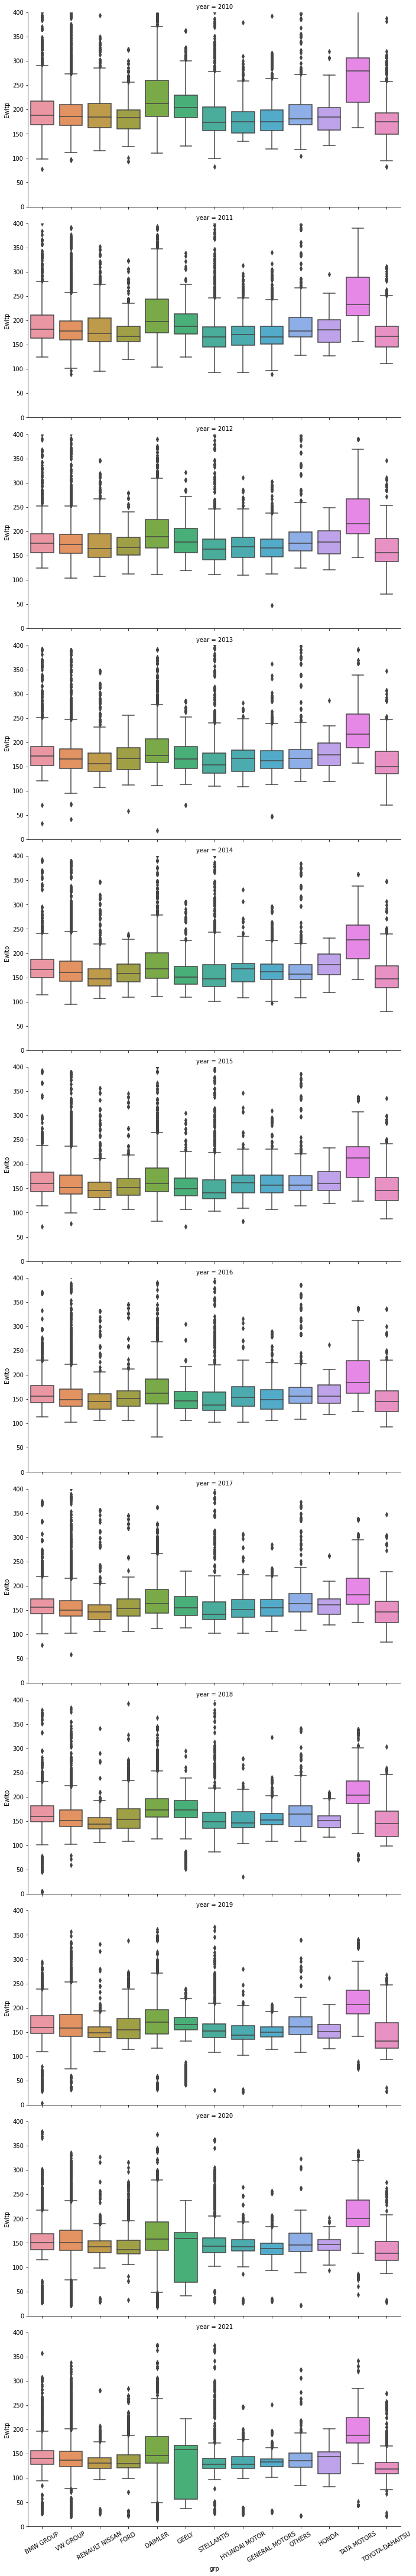

In [ ]:
ax=sns.catplot(x='grp', y='Ewltp', kind='box', row='year', data=df, height=5, aspect=2);
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
ax.set(ylim=(0, 400));

Text(0.5, 1.0, 'Evolution des émissions de CO2 par année')

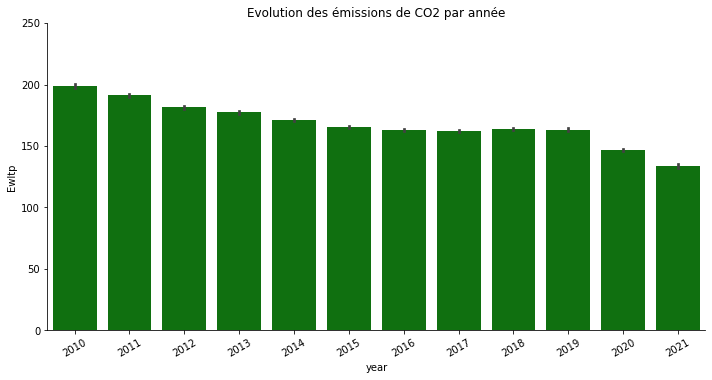

In [ ]:
### CH
### Visualisation de l'évolution des émissions pour une marque (BMW)

df_BMW=df.loc[df['grp']=='BMW GROUP']

ax=sns.catplot(x='year', y='Ewltp', kind='bar', data=df_BMW, height=5, aspect=2,color='green');
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
ax.set(ylim=(0, 250));
plt.title('Evolution des émissions de CO2 par année')

# On voit l'évolution grossièrement
# On peut affiner avec des "violin" plots par exemple

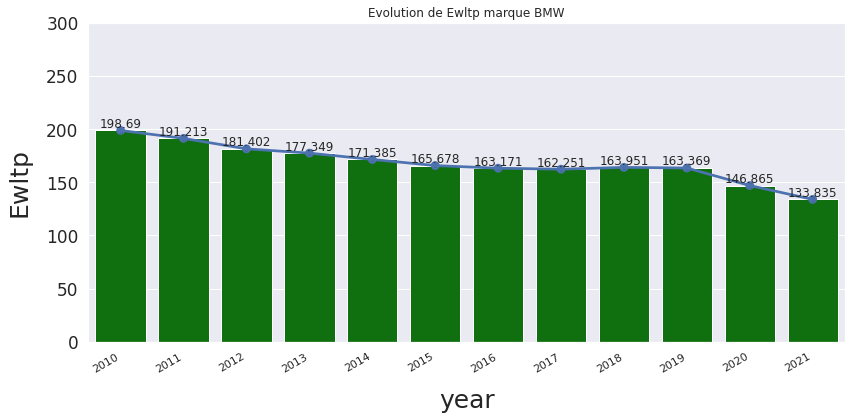


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


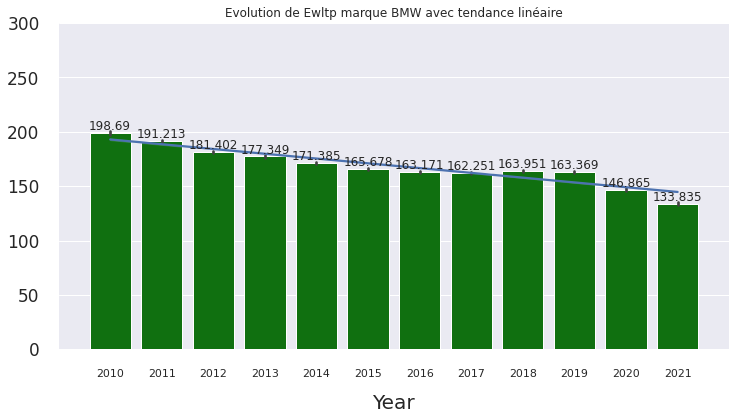

In [ ]:
# Proposition de Hai (01/08/2022):
# Option 1: Relier simplement les valeurs moyennes de chaque année
sns.set(rc={'figure.figsize': (12, 6), 'axes.labelsize': 25, 'ytick.labelsize': 17, 'axes.labelpad': 15,
            'legend.fontsize': 20})
fig, ax1 = plt.subplots()
sns.barplot(x="year", y="Ewltp", data=df_BMW,color='green',ax=ax1).set(title='Evolution de Ewltp marque BMW')
for i in ax1.containers:
    ax1.bar_label(i,)

sns.pointplot(data=df_BMW, x='year', y='Ewltp')
ax1.margins(x=0.01)
ax1.set(ylim=(0, 300))



plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Option 2: Relier avec une droite de régression linéaire
# Comme barplot considère chaque année comme catégorie, il n'est pas possible de les utiliser pour faire une régression
# Solution: Créer les indices de 0 à 11 pour les années et les utiliser pour faire la régression linéaire
df_BMW['idx'] = df_BMW.groupby(['year']).ngroup()

# Faire les deux graphs
fig, ax1 = plt.subplots()
sns.barplot(x="year", y="Ewltp", data=df_BMW,color='green',ax=ax1).set(title='Evolution de Ewltp marque BMW avec tendance linéaire')
sns.regplot(x=df_BMW['idx'], y=df_BMW['Ewltp'], scatter=False, ax=ax1)
sns.despine(offset=10, trim=False)
ax1.set_ylabel("")
ax1.set_xticklabels(['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.set(ylim=(0, 300))
ax1.set_xlabel("Year", fontsize = 20)


plt.show()


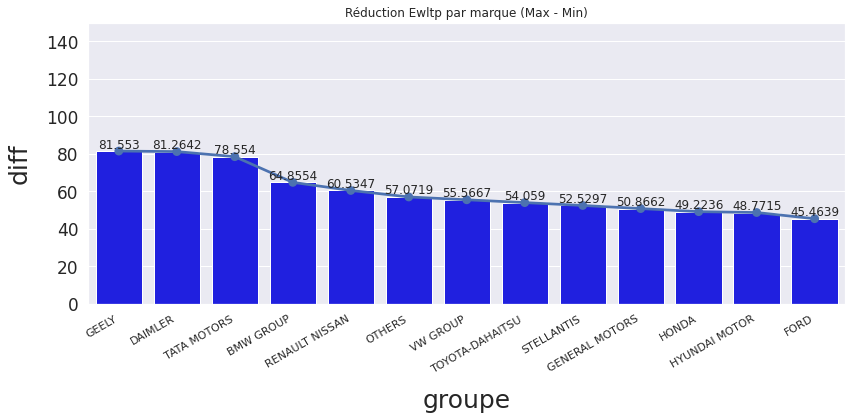

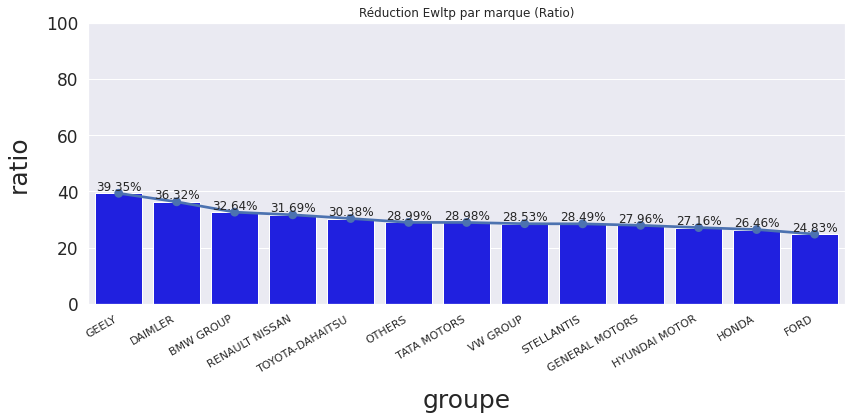

In [ ]:
# Proposition de Hai (01/08/2022):
# Classement des marques selon leur effort dans la réduction d'émission CO2
df['grp'].value_counts()
test = df.groupby(['grp',"year"])[['Ewltp']].mean()

max = test.groupby(['grp'])[['Ewltp']].max()
min = test.groupby(['grp'])[['Ewltp']].min()

max.rename({'Ewltp': 'max'}, axis=1, inplace=True)
min.rename({'Ewltp': 'min'}, axis=1, inplace=True)

diff = []
diff = pd.DataFrame(diff)

diff["diff"] = max["max"] - min["min"]
diff["ratio"] = ((max["max"] - min["min"])/max["max"])*100

# Création de la variable groupe à partir de l'index
diff['groupe'] = diff.index
diff
# Réduction Ewltp par marque (Max - Min):
diff.sort_values(by=['diff'], inplace=True, ascending=False)

sns.set(rc={'figure.figsize': (12, 6), 'axes.labelsize': 25, 'ytick.labelsize': 17, 'axes.labelpad': 15,
            'legend.fontsize': 20})
fig, ax1 = plt.subplots()
sns.barplot(x="groupe", y="diff", data=diff,color='blue',ax=ax1).set(title='Réduction Ewltp par marque (Max - Min)')
for i in ax1.containers:
    ax1.bar_label(i,)

sns.pointplot(data=diff, x='groupe', y='diff')
ax1.margins(x=0.01)
ax1.set(ylim=(0, 150))

plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Réduction Ewltp par marque (Ratio):
diff.sort_values(by=['ratio'], inplace=True, ascending=False)

sns.set(rc={'figure.figsize': (12, 6), 'axes.labelsize': 25, 'ytick.labelsize': 17, 'axes.labelpad': 15,
            'legend.fontsize': 20})
fig, ax1 = plt.subplots()
sns.barplot(x="groupe", y="ratio", data=diff,color='blue',ax=ax1).set(title='Réduction Ewltp par marque (Ratio)')
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f%%')

sns.pointplot(data=diff, x='groupe', y='ratio')
ax1.margins(x=0.01)
ax1.set(ylim=(0, 100))

plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()


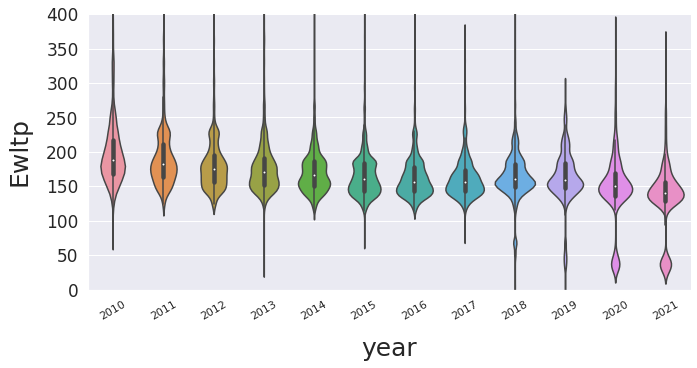

In [ ]:
ax=sns.catplot(x='year', y='Ewltp', kind='violin', data=df_BMW, height=5, aspect=2);
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
ax.set(ylim=(0, 400));

# Interessant aussi
# On voit qu'à partir de 2017, des bulles se forment en dessous de 50 pour Ewltp
# Sans doute en lien avec l'apparition des véhicules électriques

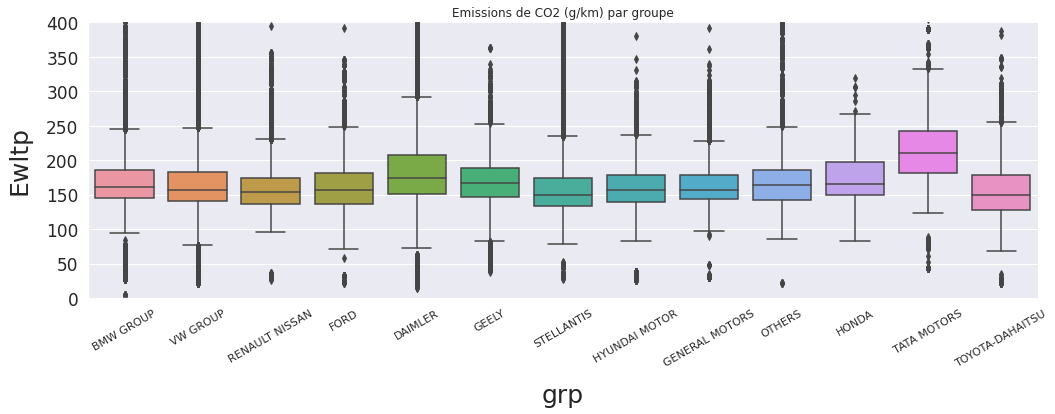

In [ ]:
ax = sns.catplot(x='grp', y='Ewltp', kind='box', data=df, height=5, aspect=3);
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
plt.title('Emissions de CO2 (g/km) par groupe')
ax.set(ylim=(0, 400));



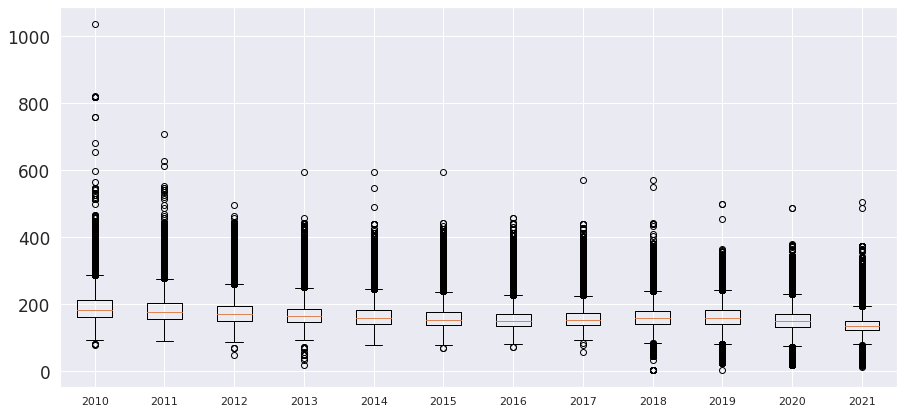

In [ ]:
years=df.year.unique()
years.sort()

l=[]
for an in years:
    l.append(df[df['year']==an]['Ewltp'])

plt.figure(figsize = (15,7));
plt.boxplot(l);
plt.xticks(range(1,13),years);
plt.grid(True)

In [ ]:
############
#### Hai ####
# 29/07/22 #
############
dfHAI=df.copy()
counts = dfHAI['Ft'].value_counts()
############################################
#Regroupement des catégories de "Fuel Type"##
############################################
## J'ai rajouté ces étapes au preprocessing (Creation-df.ipynb)

#dfHAI['Ft'].value_counts()
#dfHAI['Ft2'] = df['Ft']

#Harmoniser les catégories#
#dfHAI['Ft2'] = dfHAI['Ft'].str.lower()
#dfHAI['Ft2'] = dfHAI['Ft2'].str.replace('-','/')
#dfHAI['Ft2'] = dfHAI['Ft2'].str.replace('_','/')
#dfHAI['Ft2'] = dfHAI['Ft2'].replace(['petrol/electric','diesel/electric','hybrid/petrol/e'],'hybrid')
#dfHAI['Ft2'].value_counts()

In [ ]:
#Supprimer les catéogories avec faible effectif#
dfHAI = dfHAI.loc[dfHAI['Ft'].isin(counts.index[counts > 600])]
dfHAI['Ft'].value_counts()

diesel    300247
petrol    256073
hybrid      8106
lpg         2889
ng          2092
e85          844
Name: Ft, dtype: int64

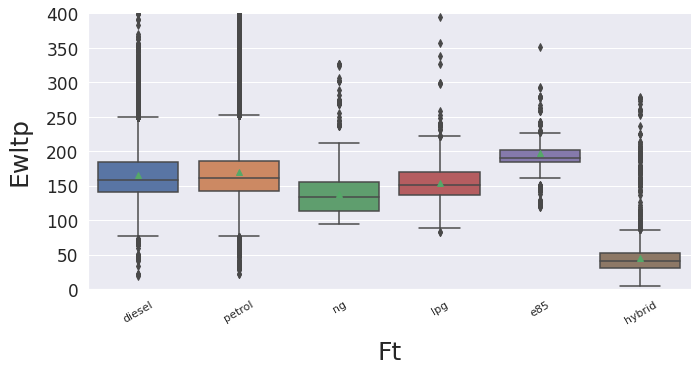

In [ ]:
#Boxplot#

ft_box=sns.catplot(x='Ft', y='Ewltp', kind='box', data=dfHAI, height=5, aspect=2, 
            showmeans=True);
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
ft_box.set(ylim=(0, 400));



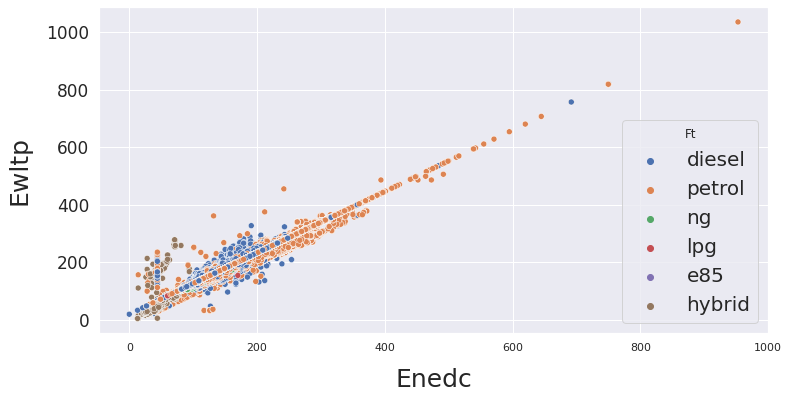

In [ ]:
ft_scatter =sns.scatterplot(x="Enedc", y="Ewltp",
              hue="Ft",
              data=dfHAI);

# Corrélation variables continues


In [ ]:
# Matrice de corrélation (rappel, déjà tracée au dessus)
corr = df.corr()

#Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns);

In [ ]:
vcont1=['Ewltp','Enedc','m', 'W','Ft']

In [ ]:
vcont2=['Ewltp','At1', 'At2','ec', 'ep','Ft']

In [ ]:
vcont3=['Ewltp','Erwltp','De', 'FuelCons', 'Ft']

In [ ]:
dfcont1=df.loc[:,vcont1]
dfcont2=df.loc[:,vcont2]
dfcont3=df.loc[:,vcont3]

In [ ]:

sns.pairplot(dfcont1, hue='Ft');

In [ ]:
sns.pairplot(dfcont2, hue='Ft');

In [ ]:
sns.pairplot(dfcont3, hue='Ft');

# Création nouvelles targets
## Pour classification


In [ ]:
# Insérez votre code ici
nv=['A','B','C','D','E','F','G']
ewltp_disc=pd.cut(df['Ewltp'],bins=[0,100,120,140,160,200,250,np.inf], labels=nv)
#Pour avoir bonus -> emissions <20 g/km
#Seulement une centaine de véhicules correspondant (car les véhicules respectant cet objectif sont essentiellement electriques)

df['Classe_emission']=ewltp_disc

In [ ]:
# Répartition classe d'émission par groupe : 
#Graphe à tracer 

In [ ]:
ok2030=['Oui','Non']
ewltp_disc_2=pd.cut(df['Ewltp'], bins=[0,123,np.inf], labels=ok2030)
df['OK_2030']=ewltp_disc_2

# Préprocessing


## Pré-processing sans variable GROUPE
#### 1. split 2. one_hot_encoder  3. scaling (num)


In [ ]:
## On commencer par enlever les variables qu'on exploitera pas (pour le moment)
cars=df.drop(['Ernedc','Erwltp', 'De', 'FuelCons','Enedc','IT','Status'], axis=1)

cars.index=cars['grp']+ ' - ' + cars['Cn']
cars=cars.drop(['grp','Cn'], axis=1)
target=cars['Ewltp']
target_classe=cars['Classe_emission']
target_30=cars['OK_2030']
data=cars.drop('Ewltp', axis=1)
#Split AVANT scaling et encoding
X_train0, X_test0, y_train, y_test, cl_train, cl_test, cl30_train, cl30_test = train_test_split(
    data, target,target_classe, target_30, test_size=0.2, random_state=204)

In [ ]:
#Scaling uniquement des variables numériques
X_train_num=X_train0.select_dtypes(include=['float64', 'int64'])
X_test_num=X_test0.select_dtypes(include=['float64', 'int64'])

scaler=StandardScaler().fit(X_train_num)
X_train_num_scaled=scaler.transform(X_train_num)
X_test_num_scaled=scaler.transform(X_test_num)

X_train_num2=pd.DataFrame(X_train_num_scaled, X_train_num.index, X_train_num.columns)
X_test_num2=pd.DataFrame(X_test_num_scaled, X_test_num.index, X_test_num.columns)

In [ ]:
#OneHotEncoder sur variables catégorielles
X_train_cat=X_train0.select_dtypes(include='object')
X_test_cat=X_test0.select_dtypes(include='object')
enc = OneHotEncoder(handle_unknown='ignore')

X_train_cat_enc=enc.fit_transform(X_train_cat).toarray()
X_test_cat_enc=enc.transform(X_test_cat).toarray()

X_train_cat2=pd.DataFrame(X_train_cat_enc, X_train_cat.index,enc.get_feature_names_out())
X_test_cat2=pd.DataFrame(X_test_cat_enc, X_test_cat.index,enc.get_feature_names_out())

In [ ]:
#A utiliser pour modèles sensibles au scaling
X_train_scaled=pd.concat([X_train_num2, X_train_cat2],axis=1 )
X_test_scaled=pd.concat([X_test_num2, X_test_cat2],axis=1 )

# A utiliser pour modèles pour lesquels scaling pas nécessaire
X_train=pd.concat([X_train_num, X_train_cat2],axis=1 )
X_test=pd.concat([X_test_num, X_test_cat2],axis=1 )


## Pré-processing avec variable GROUPE
###CONSERVATION VARIABLE GROUPE :
#### 1. split 2. one_hot_encoder  3. scaling (num)


In [ ]:
## On commence par enlever les variables qu'on exploitera pas (pour le moment)
cars2=df.drop(['Ernedc','Erwltp', 'De', 'FuelCons','Enedc','IT','Status'], axis=1)
cars2=cars2.set_index('Cn')

data2=cars2.drop('Ewltp', axis=1)
#Split AVANT scaling et encoding
X_train0_grp, X_test0_grp, y_train_grp, y_test_grp, cl_train_grp, cl_test_grp = train_test_split(data2, target,target_classe, test_size=0.2, random_state=204)

In [ ]:
X_train_num_grp=X_train0_grp.select_dtypes(include=['float64', 'int64'])
X_test_num_grp=X_test0_grp.select_dtypes(include=['float64', 'int64'])
scaler=StandardScaler().fit(X_train_num_grp)
X_train_num_grp_scaled=scaler.transform(X_train_num_grp)
X_test_num_grp_scaled=scaler.transform(X_test_num_grp)

X_train_num2_grp=pd.DataFrame(X_train_num_grp_scaled, X_train_num_grp.index, X_train_num_grp.columns)
X_test_num2_grp=pd.DataFrame(X_test_num_grp_scaled, X_test_num_grp.index, X_test_num_grp.columns)

In [ ]:
X_train_cat_grp=X_train0_grp.select_dtypes(include='object')
X_test_cat_grp=X_test0_grp.select_dtypes(include='object')

enc = OneHotEncoder(handle_unknown='ignore')

X_train_cat_grp_enc=enc.fit_transform(X_train_cat_grp).toarray()
X_test_cat_grp_enc=enc.transform(X_test_cat_grp).toarray()

X_train_cat2_grp=pd.DataFrame(X_train_cat_grp_enc, X_train_cat_grp.index,enc.get_feature_names_out())
X_test_cat2_grp=pd.DataFrame(X_test_cat_grp_enc, X_test_cat_grp.index,enc.get_feature_names_out())

In [ ]:
#A utiliser pour modèles sensibles au scaling
X_train_grp_scaled=pd.concat([X_train_num2_grp, X_train_cat2_grp],axis=1 )
X_test_grp_scaled=pd.concat([X_test_num2_grp, X_test_cat2_grp],axis=1 )
# A utiliser pour modèles pour lesquels scaling pas nécessaire

X_train_grp=pd.concat([X_train_num_grp, X_train_cat2_grp],axis=1 )
X_test_grp=pd.concat([X_test_num_grp, X_test_cat2_grp],axis=1 )

## Pré-processing : Feature selection

In [ ]:
sel90 = SelectPercentile(percentile = 90)
sel90.fit(X_train_scaled, y_train)

# Recupération masque du sélecteur
mask=sel90.get_support()

# Dictionnaire
dic_feature_90={}
for index,element in enumerate(X_train_scaled.columns.to_list()) :
  dic_feature_90[element]=mask[index]

dic_feature_90


{'m': True,
 'W': True,
 'At1': True,
 'At2': True,
 'ec': True,
 'ep': True,
 'year': True,
 'Ct_M1': True,
 'Ct_M1G': True,
 'Ct_N1': False,
 'Ct_N1G': False,
 'Ft_diesel': True,
 'Ft_e85': True,
 'Ft_hybrid': True,
 'Ft_lpg': True,
 'Ft_ng': True,
 'Ft_petrol': True,
 'Fm_B': True,
 'Fm_F': True,
 'Fm_M': True}

In [ ]:
X_train_scaled_90=X_train_scaled.drop(columns=['Ct_N1','Ct_N1G'])
X_test_scaled_90=X_test_scaled.drop(columns=['Ct_N1','Ct_N1G'])

X_train_scaled_90.shape

(441075, 18)

In [ ]:
sel75 = SelectPercentile(percentile = 75)
sel75.fit(X_train_scaled, y_train)

# Recupération masque du sélecteur
mask=sel75.get_support()

# Dictionnaire
dic_feature_75={}
for index,element in enumerate(X_train_scaled.columns.to_list()) :
  dic_feature_75[element]=mask[index]

dic_feature_75

{'m': True,
 'W': True,
 'At1': True,
 'At2': True,
 'ec': True,
 'ep': True,
 'year': True,
 'Ct_M1': True,
 'Ct_M1G': True,
 'Ct_N1': False,
 'Ct_N1G': False,
 'Ft_diesel': True,
 'Ft_e85': True,
 'Ft_hybrid': True,
 'Ft_lpg': False,
 'Ft_ng': True,
 'Ft_petrol': True,
 'Fm_B': False,
 'Fm_F': True,
 'Fm_M': False}

In [ ]:
X_train_scaled_75=X_train_scaled.drop(columns=['Ct_N1','Ct_N1G','Ft_lpg','Fm_B','Fm_M'])
X_test_scaled_75=X_test_scaled.drop(columns=['Ct_N1','Ct_N1G','Ft_lpg','Fm_B','Fm_M'])

X_train_scaled_75.shape

(441075, 15)

In [ ]:
sel50 = SelectPercentile(percentile = 50)
sel50.fit(X_train_scaled, y_train)

# Recupération masque du sélecteur
mask=sel50.get_support()

# Dictionnaire
dic_feature_50={}
for index,element in enumerate(X_train_scaled.columns.to_list()) :
  dic_feature_50[element]=mask[index]

dic_feature_50

{'m': True,
 'W': True,
 'At1': False,
 'At2': True,
 'ec': True,
 'ep': True,
 'year': True,
 'Ct_M1': True,
 'Ct_M1G': True,
 'Ct_N1': False,
 'Ct_N1G': False,
 'Ft_diesel': True,
 'Ft_e85': False,
 'Ft_hybrid': True,
 'Ft_lpg': False,
 'Ft_ng': False,
 'Ft_petrol': False,
 'Fm_B': False,
 'Fm_F': False,
 'Fm_M': False}

In [ ]:
X_train_scaled_50=X_train_scaled.drop(columns=['At1','Ct_N1','Ct_N1G','Ft_e85','Ft_lpg','Ft_ng','Ft_petrol','Fm_B','Fm_F','Fm_M'])
X_test_scaled_50=X_test_scaled.drop(columns=['At1','Ct_N1','Ct_N1G','Ft_e85','Ft_lpg','Ft_ng','Ft_petrol','Fm_B','Fm_F','Fm_M'])

X_train_scaled_50.shape

(441075, 10)

## Pré-processing : Echantillonnage

In [ ]:
'''
Ne marche pas, car difficile de retrouver le y associé à X.

X_train_scaled_100=X_train_scaled.sample(n=100)
index_100=X_train_scaled_100.index

y_train_100=[]
for i in index_100:
  y_train_100.append(y_train[i].mean())

'''

'\nNe marche pas, car difficile de retrouver le y associé à X.\n\nX_train_scaled_100=X_train_scaled.sample(n=100)\nindex_100=X_train_scaled_100.index\n\ny_train_100=[]\nfor i in index_100:\n  y_train_100.append(y_train[i].mean())\n\n'

In [ ]:
df_100_0=df.sample(n=100)
df_100_0.head()

Cn  Ct       m  Enedc       Ewltp       W     At1  \
321758              A4 AVANT  M1  1595.0  115.0  149.000000  2829.0  1575.0   
403683                 CADDY  M1  1477.0  140.0  154.000000  2682.0  1543.0   
59608   S-MAX TITANIUM TURBO  M1  1734.0  129.0  156.511503  2850.0  1606.0   
571846                 ASTRA  M1  1437.0  146.0  174.657850  2695.0  1587.0   
143431                 FOCUS  M1  1388.0   98.0  126.000000  2700.0  1576.0   

           At2      Ft Fm  ...         IT  Ernedc Erwltp  De  Status  year  \
321758  1568.0  diesel  M  ...        NaN     NaN    NaN NaN       F  2019   
403683  1534.0  diesel  M  ...        NaN     NaN    NaN NaN       F  2018   
59608   1606.0  diesel  M  ...        NaN     NaN    NaN NaN       F  2017   
571846  1587.0  petrol  M  ...        NaN     NaN    NaN NaN       F  2014   
143431  1581.0  petrol  M  ...  E13 27 19     2.9    NaN NaN       P  2020   

       FuelCons             grp  Classe_emission OK_2030  
321758      NaN        VW GROUP                D     Non  
403683      NaN        VW GROUP                D     Non  
59608       NaN            FORD                D     Non  
571846      NaN  GENERAL MOTORS                E     Non  
143431      NaN            FORD                C     Non  

[5 rows x 22 columns]

In [ ]:
## On commence par enlever les variables qu'on exploitera pas (pour le moment)
df_100=df_100_0.drop(['Ernedc','Erwltp', 'De', 'FuelCons','Enedc','IT','Status'], axis=1)

df_100.index=df_100['grp']+ ' - ' + df_100['Cn']
df_100=df_100.drop(['grp','Cn'], axis=1)
target=df_100['Ewltp']
data=df_100.drop('Ewltp', axis=1)

#Split AVANT scaling et encoding
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(data, target,test_size=0.2)

#Scaling uniquement des variables numériques
X_train_100_num=X_train_100.select_dtypes(include=['float64', 'int64'])
X_test_100_num=X_test_100.select_dtypes(include=['float64', 'int64'])

scaler=StandardScaler().fit(X_train_100_num)
X_train_100_num_scaled=scaler.transform(X_train_100_num)
X_test_100_num_scaled=scaler.transform(X_test_100_num)

X_train_num3=pd.DataFrame(X_train_100_num_scaled,X_train_100_num.index, X_train_100_num.columns)
X_test_num3=pd.DataFrame(X_test_100_num_scaled,X_test_100_num.index, X_test_100_num.columns)

#OneHotEncoder sur variables catégorielles
X_train_100_cat=X_train_100.select_dtypes(include='object')
X_test_100_cat=X_test_100.select_dtypes(include='object')
enc = OneHotEncoder(handle_unknown='ignore')

X_train_100_cat_enc=enc.fit_transform(X_train_100_cat).toarray()
X_test_100_cat_enc=enc.transform(X_test_100_cat).toarray()

X_train_cat3=pd.DataFrame(X_train_100_cat_enc,X_train_100_cat.index, enc.get_feature_names_out())
X_test_cat3=pd.DataFrame(X_test_100_cat_enc,X_test_100_cat.index, enc.get_feature_names_out())

#A utiliser pour modèles sensibles au scaling
X_train_100_scaled=pd.concat([X_train_num3, X_train_cat3],axis=1 )
X_test_100_scaled=pd.concat([X_test_num3, X_test_cat3],axis=1 )


In [ ]:
X_train_100_scaled.head()

m         W       At1  \
GENERAL MOTORS - CORSA-E                     -0.966764 -1.169318 -0.741785   
GEELY - XC40                                  0.303699 -0.067501  0.221257   
DAIMLER - E250                                0.730602  0.265340  0.213792   
STELLANTIS - COMPASS                          0.850134 -0.446250 -0.189342   
TATA MOTORS - R ROVER VELAR R-DYN HSE P250 A  1.259961  0.919544  0.512409   

                                                   At2        ec        ep  \
GENERAL MOTORS - CORSA-E                     -0.807968 -0.841233 -0.875516   
GEELY - XC40                                  0.389295  0.075407 -0.235364   
DAIMLER - E250                                0.145408  0.296621  0.295356   
STELLANTIS - COMPASS                         -0.261070  0.058879  0.004692   
TATA MOTORS - R ROVER VELAR R-DYN HSE P250 A  0.618401  0.111004  0.948915   

                                                  year  Ct_M1  Ct_M1G  \
GENERAL MOTORS - CORSA-E                      0.100629    1.0     0.0   
GEELY - XC40                                  0.995112    1.0     0.0   
DAIMLER - E250                               -0.495693    1.0     0.0   
STELLANTIS - COMPASS                          1.293273    0.0     1.0   
TATA MOTORS - R ROVER VELAR R-DYN HSE P250 A  0.696951    0.0     1.0   

                                              Ft_diesel  Ft_hybrid  Ft_ng  \
GENERAL MOTORS - CORSA-E                            1.0        0.0    0.0   
GEELY - XC40                                        1.0        0.0    0.0   
DAIMLER - E250                                      1.0        0.0    0.0   
STELLANTIS - COMPASS                                1.0        0.0    0.0   
TATA MOTORS - R ROVER VELAR R-DYN HSE P250 A        0.0        0.0    0.0   

                                              Ft_petrol  Fm_B  Fm_M  
GENERAL MOTORS - CORSA-E                            0.0   0.0   1.0  
GEELY - XC40                                        0.0   0.0   1.0  
DAIMLER - E250                                      0.0   0.0   1.0  
STELLANTIS - COMPASS                                0.0   0.0   1.0  
TATA MOTORS - R ROVER VELAR R-DYN HSE P250 A        1.0   0.0   1.0

In [ ]:
df_1000_0=df.sample(n=1000)
display(df_1000_0.head())

## On commence par enlever les variables qu'on exploitera pas (pour le moment)
df_1000=df_1000_0.drop(['Ernedc','Erwltp', 'De', 'FuelCons','Enedc','IT','Status'], axis=1)

df_1000.index=df_1000['grp']+ ' - ' + df_1000['Cn']
df_1000=df_1000.drop(['grp','Cn'], axis=1)
target=df_1000['Ewltp']
data=df_1000.drop('Ewltp', axis=1)

#Split AVANT scaling et encoding
X_train_1000, X_test_1000, y_train_1000, y_test_1000 = train_test_split(data, target,test_size=0.2)

#Scaling uniquement des variables numériques
X_train_1000_num=X_train_1000.select_dtypes(include=['float64', 'int64'])
X_test_1000_num=X_test_1000.select_dtypes(include=['float64', 'int64'])

scaler=StandardScaler().fit(X_train_1000_num)
X_train_1000_num_scaled=scaler.transform(X_train_1000_num)
X_test_1000_num_scaled=scaler.transform(X_test_1000_num)

X_train_num4=pd.DataFrame(X_train_1000_num_scaled,X_train_1000_num.index, X_train_1000_num.columns)
X_test_num4=pd.DataFrame(X_test_1000_num_scaled,X_test_1000_num.index, X_test_1000_num.columns)

#OneHotEncoder sur variables catégorielles
X_train_1000_cat=X_train_1000.select_dtypes(include='object')
X_test_1000_cat=X_test_1000.select_dtypes(include='object')
enc = OneHotEncoder(handle_unknown='ignore')

X_train_1000_cat_enc=enc.fit_transform(X_train_1000_cat).toarray()
X_test_1000_cat_enc=enc.transform(X_test_1000_cat).toarray()

X_train_cat4=pd.DataFrame(X_train_1000_cat_enc,X_train_1000_cat.index, enc.get_feature_names_out())
X_test_cat4=pd.DataFrame(X_test_1000_cat_enc,X_test_1000_cat.index, enc.get_feature_names_out())

#A utiliser pour modèles sensibles au scaling
X_train_1000_scaled=pd.concat([X_train_num4, X_train_cat4],axis=1 )
X_test_1000_scaled=pd.concat([X_test_num4, X_test_cat4],axis=1 )

display(X_train_1000_scaled.head())

Cn  Ct       m  Enedc       Ewltp       W  \
112992  V90 INSCRIPTION D5 AWD AUTO  M1  2011.0  146.0  177.000000  2941.0   
65721                          ADAM  M1  1086.0  125.0  152.241774  2311.0   
551622                    FIAT 500L  M1  1370.0  110.0  136.230291  2612.0   
262814      RENEGADE LONGITUDE AUTO  M1  1395.0  137.0  165.050960  2570.0   
155604                       PASSAT  M1  1530.0  160.0  189.601900  2711.0   

           At1     At2      Ft Fm  ...   IT  Ernedc Erwltp  De  Status  year  \
112992  1617.0  1618.0  diesel  M  ...  NaN     NaN    NaN NaN       P  2020   
65721   1472.0  1464.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2017   
551622  1522.0  1519.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2014   
262814  1551.0  1553.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2016   
155604  1542.0  1541.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2012   

       FuelCons             grp  Classe_emission OK_2030  
112992      NaN           GEELY                E     Non  
65721       NaN  GENERAL MOTORS                D     Non  
551622      NaN      STELLANTIS                C     Non  
262814      NaN      STELLANTIS                E     Non  
155604      NaN        VW GROUP                E     Non  

[5 rows x 22 columns]

m         W       At1       At2        ec  \
GENERAL MOTORS - MOKKA X    -0.597694 -0.752867 -0.258731 -0.293635 -0.841331   
DAIMLER - CLA 180           -0.498704  0.041234  0.319506  0.603007 -0.895853   
VW GROUP - GOLF             -0.463579 -0.661591 -0.186451 -0.514725  0.065087   
VW GROUP - FABIA            -1.156506 -1.227502 -1.254582 -1.890394 -1.122457   
VW GROUP - CALIFORNIA BEACH  1.829149  1.278023  0.375723 -0.047980  0.187760   

                                   ep      year  Ct_M1  Ct_M1G  Ft_diesel  \
GENERAL MOTORS - MOKKA X    -0.342376  0.809716    1.0     0.0        0.0   
DAIMLER - CLA 180           -0.402119  1.396733    1.0     0.0        0.0   
VW GROUP - GOLF             -0.860149 -0.364317    1.0     0.0        1.0   
VW GROUP - FABIA            -1.298265 -0.364317    1.0     0.0        1.0   
VW GROUP - CALIFORNIA BEACH  0.235141 -0.657825    1.0     0.0        1.0   

                             Ft_hybrid  Ft_lpg  Ft_ng  Ft_petrol  Fm_B  Fm_M  
GENERAL MOTORS - MOKKA X           0.0     0.0    0.0        1.0   0.0   1.0  
DAIMLER - CLA 180                  0.0     0.0    0.0        1.0   0.0   1.0  
VW GROUP - GOLF                    0.0     0.0    0.0        0.0   0.0   1.0  
VW GROUP - FABIA                   0.0     0.0    0.0        0.0   0.0   1.0  
VW GROUP - CALIFORNIA BEACH        0.0     0.0    0.0        0.0   0.0   1.0

## Pré-processing : Ciblage d'un seul groupe pour interprétabilités locales

In [ ]:
df_renault_0=df.loc[df['grp']=='RENAULT NISSAN']
display(df_renault_0.head())
df_renault_0.shape


Cn   Ct       m       Enedc  Ewltp       W     At1     At2  \
0           CAPTUR   M1  1322.0  141.285555  132.0  2639.0  1541.0  1554.0   
3          SANDERO   M1  1111.0  130.980451  121.0  2604.0  1526.0  1520.0   
33  NISSAN QASHQAI   M1  1390.0  168.453558  161.0  2646.0  1560.0  1560.0   
37          ARKANA   M1  1411.0  142.222383  133.0  2720.0  1562.0  1584.0   
51  NISSAN X-TRAIL  M1G  1760.0  189.063766  183.0  2705.0  1585.0  1585.0   

        Ft Fm  ...         IT  Ernedc Erwltp  De  Status  year FuelCons  \
0   petrol  M  ...        NaN     NaN    NaN NaN       P  2021      5.8   
3   petrol  M  ...  e9  28 29     NaN    NaN NaN       P  2021      5.4   
33  petrol  M  ...        NaN     NaN    NaN NaN       P  2021      NaN   
37  petrol  M  ...      e2 33     NaN    1.9 NaN       P  2021      5.3   
51  diesel  M  ...        NaN     NaN    NaN NaN       P  2021      NaN   

               grp  Classe_emission OK_2030  
0   RENAULT NISSAN                C     Non  
3   RENAULT NISSAN                C     Oui  
33  RENAULT NISSAN                E     Non  
37  RENAULT NISSAN                C     Non  
51  RENAULT NISSAN                E     Non  

[5 rows x 22 columns]

(44627, 22)

In [ ]:
df_renault_1000_0=df_renault_0.sample(n=1000)
display(df_renault_1000_0.head())
display(df_renault_1000_0.shape)

## On commence par enlever les variables qu'on exploitera pas (pour le moment)
df_renault_1000=df_renault_1000_0.drop(['Ernedc','Erwltp', 'De', 'FuelCons','Enedc','IT','Status'], axis=1)

df_renault_1000.index=df_renault_1000['grp']+ ' - ' + df_renault_1000['Cn']
df_renault_1000=df_renault_1000.drop(['grp','Cn'], axis=1)
target=df_renault_1000['Ewltp']
data=df_renault_1000.drop('Ewltp', axis=1)

#Split AVANT scaling et encoding
X_train_renault_1000, X_test_renault_1000, y_train_renault_1000, y_test_renault_1000 = train_test_split(data, target,test_size=0.2)

#Scaling uniquement des variables numériques
X_train_renault_1000_num=X_train_renault_1000.select_dtypes(include=['float64', 'int64'])
X_test_renault_1000_num=X_test_renault_1000.select_dtypes(include=['float64', 'int64'])

scaler=StandardScaler().fit(X_train_renault_1000_num)
X_train_renault_1000_num_scaled=scaler.transform(X_train_renault_1000_num)
X_test_renault_1000_num_scaled=scaler.transform(X_test_renault_1000_num)

X_train_num5=pd.DataFrame(X_train_renault_1000_num_scaled,X_train_renault_1000_num.index, X_train_renault_1000_num.columns)
X_test_num5=pd.DataFrame(X_test_renault_1000_num_scaled,X_test_renault_1000_num.index, X_test_renault_1000_num.columns)

#OneHotEncoder sur variables catégorielles
X_train_renault_1000_cat=X_train_renault_1000.select_dtypes(include='object')
X_test_renault_1000_cat=X_test_renault_1000.select_dtypes(include='object')
enc = OneHotEncoder(handle_unknown='ignore')

X_train_renault_1000_cat_enc=enc.fit_transform(X_train_renault_1000_cat).toarray()
X_test_renault_1000_cat_enc=enc.transform(X_test_renault_1000_cat).toarray()

X_train_cat5=pd.DataFrame(X_train_renault_1000_cat_enc,X_train_renault_1000_cat.index, enc.get_feature_names_out())
X_test_cat5=pd.DataFrame(X_test_renault_1000_cat_enc,X_test_renault_1000_cat.index, enc.get_feature_names_out())

#A utiliser pour modèles sensibles au scaling
X_train_renault_1000_scaled=pd.concat([X_train_num5, X_train_cat5],axis=1 )
X_test_renault_1000_scaled=pd.concat([X_test_num5, X_test_cat5],axis=1 )

display(X_train_renault_1000_scaled.head())


Cn  Ct       m  Enedc       Ewltp       W  \
190472               JUKE ACENTA  M1  1284.0  138.0  166.118392  2530.0   
229028                   SANDERO  M1  1126.0  120.0  146.904613  2589.0   
176363                     LODGY  M1  1310.0  165.0  194.939061  2810.0   
594781              NISSAN MICRA  M1  1055.0  125.0  152.241774  2450.0   
96341   QASHQAI N-CONNECTA DIG-T  M1  1513.0  134.0  161.848664  2646.0   

           At1     At2      Ft Fm  ...   IT  Ernedc Erwltp  De  Status  year  \
190472  1525.0  1523.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2012   
229028  1497.0  1486.0     lpg  B  ...  NaN     NaN    NaN NaN       F  2013   
176363  1492.0  1478.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2012   
594781  1470.0  1475.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2014   
96341   1560.0  1560.0  petrol  M  ...  NaN     NaN    NaN NaN       F  2017   

       FuelCons             grp  Classe_emission OK_2030  
190472      NaN  RENAULT NISSAN                E     Non  
229028      NaN  RENAULT NISSAN                D     Non  
176363      NaN  RENAULT NISSAN                E     Non  
594781      NaN  RENAULT NISSAN                D     Non  
96341       NaN  RENAULT NISSAN                E     Non  

[5 rows x 22 columns]

(1000, 22)

m         W       At1       At2        ec  \
RENAULT NISSAN - TWINGO -1.913058 -1.750003 -1.366715 -2.156929 -0.926029   
RENAULT NISSAN - CLIO   -0.744228 -0.623446 -1.259257 -1.622533 -0.926029   
RENAULT NISSAN - CLIO   -0.825679 -0.623446 -1.259257 -1.745855 -0.926029   
RENAULT NISSAN - MEGANE -0.092616 -0.108912  0.859205  1.316643 -0.115731   
RENAULT NISSAN - KANGOO  0.306497  0.037324 -0.292133 -0.039900 -0.115731   

                               ep      year  Ct_M1  Ct_M1G  Ft_diesel  Ft_e85  \
RENAULT NISSAN - TWINGO -1.045320 -0.773119    1.0     0.0        0.0     0.0   
RENAULT NISSAN - CLIO   -0.459438 -1.064999    1.0     0.0        0.0     0.0   
RENAULT NISSAN - CLIO   -0.659363 -1.356880    1.0     0.0        0.0     0.0   
RENAULT NISSAN - MEGANE -0.243587  0.394404    1.0     0.0        1.0     0.0   
RENAULT NISSAN - KANGOO -0.582782  1.270046    1.0     0.0        1.0     0.0   

                         Ft_hybrid  Ft_lpg  Ft_ng  Ft_petrol  Fm_B  Fm_F  Fm_M  
RENAULT NISSAN - TWINGO        0.0     0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - CLIO          0.0     0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - CLIO          0.0     0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - MEGANE        0.0     0.0    0.0        0.0   0.0   0.0   1.0  
RENAULT NISSAN - KANGOO        0.0     0.0    0.0        0.0   0.0   0.0   1.0

## Pré-processing : Donnees finales

In [ ]:
#SANS VARIABLE GROUPE
X_train_scaled        # pour modèles sensibles au scaling
X_test_scaled         # pour modèles sensibles au scaling
X_train               # pour modèles avec scaling pas necessaire
X_test                # pour modèles avec scaling pas necessaire
X_train_scaled_90     # pour modèles sensibles au scaling, avec une feature selection à 90%
X_test_scaled_90      # pour modèles sensibles au scaling, avec une feature selection à 90%
X_train_scaled_75     # pour modèles sensibles au scaling, avec une feature selection à 75%
X_test_scaled_75      # pour modèles sensibles au scaling, avec une feature selection à 75%
X_train_scaled_50     # pour modèles sensibles au scaling, avec une feature selection à 50%
X_test_scaled_50      # pour modèles sensibles au scaling, avec une feature selection à 50%
X_train_100_scaled    # dataset de 80 lignes uniquement
X_test_100_scaled     # dataset de 20 lignes uniquement
X_train_1000_scaled    # dataset de 800 lignes uniquement
X_test_1000_scaled     # dataset de 200 lignes uniquement
X_train_renault_1000_scaled   # dataset de 800 lignes de véhicules du groupe Renault
X_test_renault_1000_scaled   # dataset de 200 lignes de véhicules du groupe Renault

#AVEC VARIABLE GROUPE
X_train_grp_scaled    # pour modèles sensibles au scaling
X_test_grp_scaled     # pour modèles sensibles au scaling
X_train_grp           # pour modèles avec scaling pas necessaire
X_test_grp            # pour modèles avec scaling pas necessaire

print("Donnees finales enregistrées")

Donnees finales enregistrées


# Régression linéaire

## Régression linéaire multiple


> Variables numériques uniquement




In [ ]:
#Test régression linéaire multiple avec seulement variables continues

In [ ]:
X_train_scaled_num=X_train_scaled[['m','W', 'At1', 'At2', 'ec', 'ep', 'year']]
X_test_scaled_num=X_test_scaled[['m','W', 'At1', 'At2', 'ec', 'ep', 'year']]


In [ ]:
lr=LinearRegression()
lr.fit(X_train_scaled_num, y_train)

LinearRegression()

In [ ]:

y_pred=lr.predict(X_test_scaled_num)
pred_train = lr.predict(X_train_scaled_num)

print('MAE test :', round(mean_absolute_error(y_test,y_pred),2))
print('MAE train :', round(mean_absolute_error(y_train,pred_train),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R² ensemble entrainement :", round(lr.score(X_train_scaled_num, y_train),3))
print("R² ensemble test :",round(lr.score(X_test_scaled_num, y_test),3))

#R² faible
print("Emissions moyennes : ", round(target.mean(),2))

MAE test : 19.18
MAE train : 19.26
RMSE: 27.23
R² ensemble entrainement : 0.553
R² ensemble test : 0.557
Emissions moyennes :  165.94


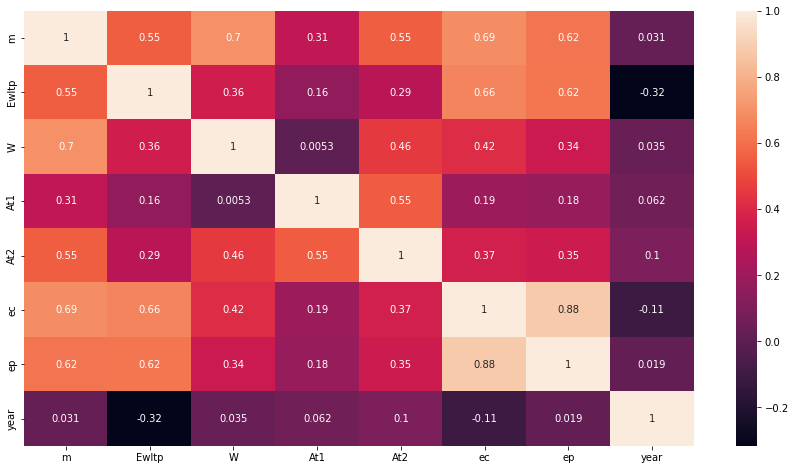

In [ ]:
# Matrice de corrélation
cars_num=cars.select_dtypes(include=['float64', 'int64'])
corr = cars_num.corr()

#Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns);

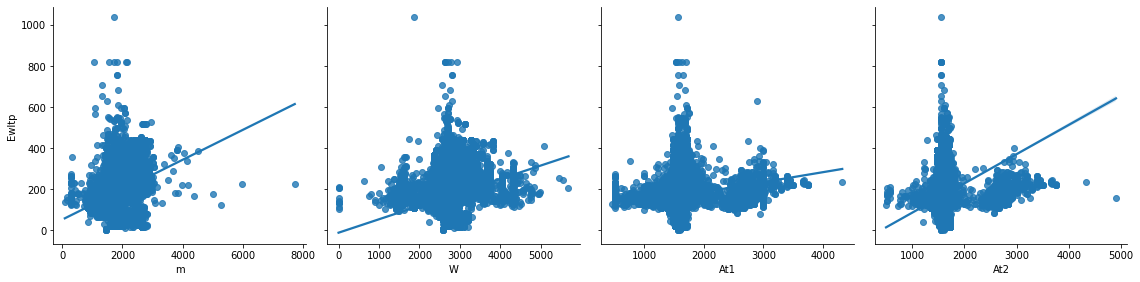

In [ ]:
g = sns.PairGrid(cars_num, y_vars=["Ewltp"], x_vars=['m','W', 'At1', 'At2'], height=4)
g.map(sns.regplot)

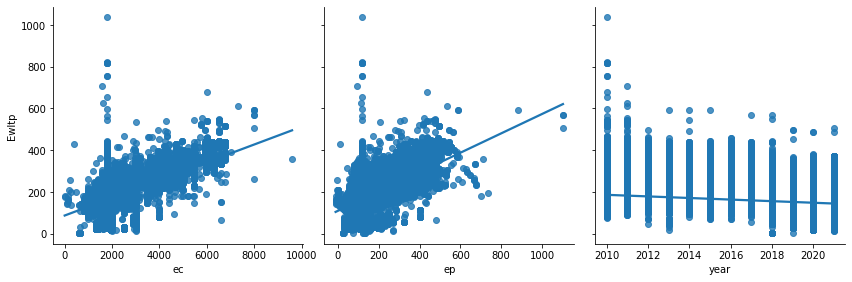

In [ ]:
g = sns.PairGrid(cars_num, y_vars=["Ewltp"], x_vars=['ec', 'ep', 'year'], height=4)
g.map(sns.regplot)



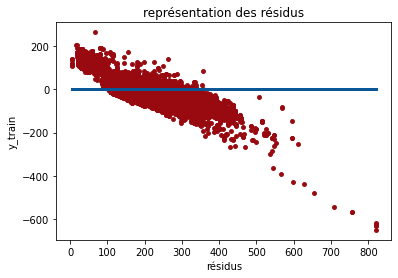

In [ ]:
residus = pred_train - y_train

plt.scatter(y_train, residus, color='#980a10', s=15);
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798');
plt.title('représentation des résidus');
plt.xlabel('résidus');
plt.ylabel('y_train');


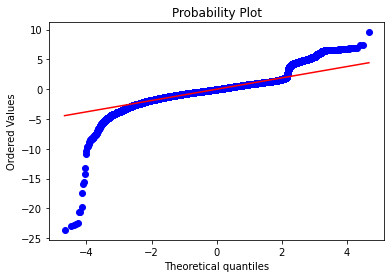

In [ ]:
residus_norm=(residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt);
plt.show();
#On ne respecte pas l'hypothèse de normalité : que faire ?? -> Passage à des modèles non linéaires


## Regression linéaire régularisée


Objectifs : 

Regression linéaire multiple
Avec conditions sur coefficients (Ridge Lasso)

Trouver les variables les plus pertinentes par rapport a la variable cible


Elastic Net (cf module Qui sera le MVP)

In [ ]:
df.columns

Variable cible : Ewltp

In [ ]:
df[['Enedc','Ewltp']].head(20)

In [ ]:
df.info()

Séparation variables numériques et variables catégorielles

In [ ]:
list_columns_df=df.columns.tolist()
cols_numeric=[]
cols_categorielles=[]

for i in list_columns_df :
    if df[i].dtypes==object:
        cols_categorielles.append(i)
    else:
        cols_numeric.append(i)

df_numeric=df[cols_numeric].copy()
df_catego=df[cols_categorielles].copy()

display("Variables numériques :",df_numeric.head())
display("Variables catégorielles :",df_catego.head())

In [ ]:
df_numeric.isna().sum()


On remplace les NaNs des Ernedc, Erwltp et De par 0.


*   Ernedc et Erwltp sont des réductions. Si elles n'existent pas, c'est parce que les véhicules sont trop vieux à priori. Donc NaN=0 (pas de réduction)
*   De est un facteur de correction entre résultat d'un test indépendant et celui annoncé par constructeur. Si inférieur à 4% ok, sinon il faut apporter une correction. On choisit donc ici de remplacer les NaNs par 0, en partant du principe que tests indépendant et du fabriquant concordent



In [ ]:
df_numeric[['Ernedc','Erwltp','De']]=df_numeric[['Ernedc','Erwltp','De']].fillna(0)
df_numeric.isna().sum()

In [ ]:
fuel_cons_mean=df['FuelCons'].mean()
fuel_cons_mean

On remplace les valeurs manquantes de FuelCons par la consommation moyenne (? pas sûr que cela soit une bonne idée. On fait ça dans un 1er temps pour avancer sur régression régularisée).

In [ ]:
df_numeric['FuelCons']=df_numeric['FuelCons'].fillna(fuel_cons_mean)
df_numeric.isna().sum()

Aucune valeur manquante dans df_numeric. On peut standardiser le dataframe, et lancer régression régularisée.

NB : il faudrait faire pareil avec variables catégorielles. A Ajouter donc au dataframe une fois que c'est fait.

In [ ]:
df_catego.isna().sum()

On conserve Cn comme index du futur dataframe.

In [ ]:
index_df=df_catego['Cn']
index_df

On supprime la variable 

In [ ]:
df_catego2=df_catego.drop(columns=['Cn'])

In [ ]:
IT_mode=df_catego2['IT'].mode().to_string()
IT_mode

In [ ]:
df_catego2['IT']=df_catego2['IT'].fillna(IT_mode)
df_catego2.isna().sum()

Conversion des modalités en valeurs numériques

In [ ]:
df_catego2.columns

In [ ]:
Ct_num=pd.get_dummies(df_catego2['Ct'],prefix='Ct')
Ft_num=pd.get_dummies(df_catego2['Ft'],prefix='Ft')
Fm_num=pd.get_dummies(df_catego2['Fm'],prefix='Fm')
IT_num=pd.get_dummies(df_catego2['IT'],prefix='IT')
Status_num=pd.get_dummies(df_catego2['Status'],prefix='Status')
grp_num=pd.get_dummies(df_catego2['grp'],prefix='grp')

In [ ]:
scaler = StandardScaler()
df_numeric_normalized=pd.DataFrame(data=scaler.fit_transform(df_numeric),index=df_numeric.index,columns=df_numeric.columns)
display(df_numeric_normalized.head())

Séparation variables explicatives et variable cible Ewltp.
La corrélation entre Enedc et Ewltp etant tres forte, je pense qu'on doit supprimer Enedc et Ernedc (dans un premier temps).

In [ ]:
df_numeric_normalized=df_numeric_normalized.drop(columns=['Enedc','Ernedc'])
df_numeric_normalized.head()

Le dataframe complet avec IT_num et grp_num fait planter Google Colab.
Je propose dans un premier temps de ne pas inclure IT et grp comme variables.

Le mieux serait, pour ne pas perdre le groupe, marque, modele dans nos modeles de regression, de fusionner ces 3 colonnes, et de faire cette colonne fusionnée comme index du dataframe final.

In [ ]:
df_final=pd.concat([df_numeric_normalized,Ct_num,Ft_num,Fm_num,Status_num],axis=1)
df_final2=df_final.rename(index=index_df)
df_final2.head()

NB : Si l'on garde IT_num et grp_num, on obtient un dataframe de 886 colonnes. En les enlevant, on tombe à 28 colonnes. Bien mieux

In [ ]:
# data, target
target=df_final2['Ewltp']
feats=df_final2.drop(columns=['Ewltp'])

# NB : Si on le fait avec les variables catégorielles rendues numériques (avec df_final2 donc), cela plante. Question Lara ?

In [ ]:
# Entrainement / Test
X_train,X_test,y_train,y_test=train_test_split(feats,target,test_size=0.2)

1. Regression Ridge

In [ ]:
# Vecteur alphas
alphas= [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 20, 35, 50]

# Creation modele de regression
from sklearn.linear_model import RidgeCV
ridge_reg=RidgeCV(alphas)

# Ajustement du modele
ridge_reg.fit(X_train,y_train)

# Affichage alpha retenu
print("Alpha sélectionné :",ridge_reg.alpha_)

# Affichage score R² sur moodèle d'entrainement et de test
print("Score modèle entrainement :",ridge_reg.score(X_train,y_train))
print("Score modèle test :",ridge_reg.score(X_test,y_test))

Creation du modele Ridge a partir du coefficient Alpha selectionné

In [ ]:
# Creation ridge performant
from sklearn.linear_model import Ridge
final_ridge=Ridge(alpha=10)

# Ajustement du modele
final_ridge.fit(X_train,y_train)

# Racine erreur quadratique
y_pred_train_ridge=final_ridge.predict(X_train)
y_pred_test_ridge=final_ridge.predict(X_test)

print("Racine carrée des erreurs quadratiques modèle entrainement :",np.sqrt(mean_squared_error(y_train,y_pred_train_ridge)))
print("Racine carrée des erreurs quadratiques modèle test :",np.sqrt(mean_squared_error(y_test,y_pred_test_ridge)))

2. Regression Lasso


In [ ]:
# Modèle LassoCV
from sklearn.linear_model import LassoCV
model_lasso=LassoCV(alphas= [10, 1, 0.1, 0.001,0.04, 0.0005])

# Entrainement du modele
model_lasso.fit(X_train,y_train)

# Score R² et MSE sur échantillon de test
y_pred_lasso_test=model_lasso.predict(X_test)
print("Score R² Lasso de modèle de test :", model_lasso.score(X_test,y_test))
print("Erreurs Lasso quadratiques du modèle de test :", mean_squared_error(y_test,y_pred_lasso_test))
print("RMSE Lasso du modèle de test :", np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)))

In [ ]:
# Alpha optimal
alpha_selectionne=model_lasso.alpha_
print(alpha_selectionne)

Modele Lasso avec coefficient optimal

In [ ]:
# Nouveau modèle de regression
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.0005)

# Ajustement sur données entrainement
lasso_reg.fit(X_train,y_train)

# Affichage coefficients
coeff_lasso=lasso_reg.coef_
print("Coefficients de Lasso avec alpha = 0.0005 :",coeff_lasso)


In [ ]:
# Affichage sous forme de graphique
plt.figure(figsize=(12,6))
plt.bar(x=feats.columns.tolist(),height=coeff_lasso)
plt.xticks(ticks=range(len(feats.columns.tolist())), labels=feats.columns.tolist(), rotation=90);

In [ ]:
dict_1={'Variables':X_train.columns, 'Coefficients':coeff_lasso}
df_reg=pd.DataFrame(dict_1)

df_reg.head()

In [ ]:
df_reg['Coefficients']=df_reg['Coefficients'].apply(lambda x:abs(x))
df_reg

In [ ]:
df_reg.sort_values(by='Coefficients',ascending=False)

Les variables les plus impactantes sur les émissions de CO2 sont donc le type de carburant, la masse, l'année, la puissance

# KNN


In [ ]:
# --------------------------------------- KNN Regressor -------------------------------------------

# Instanciation KNN
knn=KNeighborsRegressor()

# Entrainement
knn.fit(X_train_scaled,y_train)


KNeighborsRegressor()

In [ ]:
y_pred_knn=knn.predict(X_test_scaled)


print('MAE:', mean_absolute_error(y_test,y_pred_knn))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_knn)))

print("R² ensemble entrainement :", knn.score(X_train_scaled, y_train))
print("R² ensemble test :",knn.score(X_test_scaled, y_test))

MAE: 5.342240556001701
RMSE: 10.37068838619765


KeyboardInterrupt: ignored

In [ ]:
# --------------------------------------- KNN avec GridSearchCV sur 100 lignes -------------------------------------------

# Instanciation KNN
knn=KNeighborsRegressor()

# Grille de paramètres
parameters = {'weights' : ['uniform','distance'],          
              'n_neighbors' : [3,5,7,9],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2,3]
              }

# Instanciation GridSearchCV
grid=GridSearchCV(estimator=knn,
                  param_grid = parameters,
                  cv = 5)

# Entrainement
grid.fit(X_train_100_scaled,y_train_100)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Score avec ces paramètres :",grid.best_score_)

In [ ]:
# --------------------------------------- Détermination nombre de voisins optimal -------------------------------------------

rmse_val = [] 
for k in range(20):
  k=k+1
  model = KNeighborsRegressor(n_neighbors = k)
  model.fit(X_train_scaled_50,y_train) 
  pred=model.predict(X_test_scaled_50) 
  error = np.sqrt(mean_squared_error(y_test,pred)) 
  rmse_val.append(error) 
  print('La valeur RMSE pour k=', k ,'est:', error)

# Courbe
courbe = pd.DataFrame(rmse_val) 
courbe.plot()

In [ ]:
# --------------------------------------- KNN Regressor Optimisé -------------------------------------------

# Instanciation KNN
knn2=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')

# Entrainement
knn2.fit(X_train_scaled_50 ,y_train)

In [ ]:
y_pred_knn2=knn2.predict(X_test_scaled_50 )


print('MAE sur KNN optimisé:', mean_absolute_error(y_test,y_pred_knn2))
print('RMSE sur KNN optimisé:', np.sqrt(mean_squared_error(y_test, y_pred_knn2)))

print("R² ensemble entrainement sur KNN optimisé:", knn2.score(X_train_scaled, y_train))
print("R² ensemble test sur KNN optimisé:",knn2.score(X_test_scaled, y_test))

A la différence de Random Forest et Decision Tree, il n'y a pas d'attribut "feature_importances_" pour KNN. Autrement dit, nous ne pouvons pas directement visualiser quelles variables impactent le plus le résultat. 

Idée : feature selection à 10 / 25 / 75 % et voir ce qu'il se passe sur RMSE ?

## KNN - Classification


### Classes d'émissions

In [ ]:
pred_knn_cl_test=pd.cut(y_pred_knn2, bins = [0,100,120,140,160,200,250,np.inf], labels=nv)
pd.crosstab(pred_knn_cl_test, cl_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])


Niveau d'émission réel       A     B      C      D      E      F     G
Niveau d'émission prédit                                              
A                         1662    13      0      3     11      0     0
B                           35  2665    536     15      7      0     0
C                            7   742  18116   1941    112      6     0
D                           10    46   2169  25472   2240     26     3
E                           18    20    104   2435  33765   1229    36
F                            3     0      5     26    991  11412   481
G                            1     1      0      2     26    310  3567

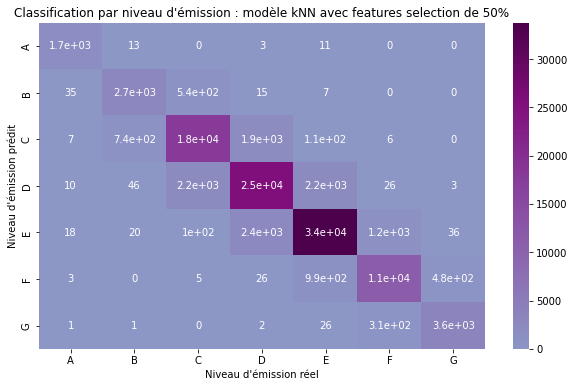

In [ ]:
crosstabHM=pd.crosstab(pred_knn_cl_test, cl_test, 
                       rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])
#Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(crosstabHM, annot=True,
            xticklabels=crosstabHM.columns,
            yticklabels=crosstabHM.columns,
            cmap="BuPu", center=0.1);
plt.title("Classification par niveau d'émission : modèle kNN avec features selection de 50%");

In [ ]:
print(classification_report(cl_test,pred_knn_cl_test))

              precision    recall  f1-score   support

           A       0.98      0.96      0.97      1736
           B       0.82      0.76      0.79      3487
           C       0.87      0.87      0.87     20930
           D       0.85      0.85      0.85     29894
           E       0.90      0.91      0.90     37152
           F       0.88      0.88      0.88     12983
           G       0.91      0.87      0.89      4087

    accuracy                           0.88    110269
   macro avg       0.89      0.87      0.88    110269
weighted avg       0.88      0.88      0.88    110269



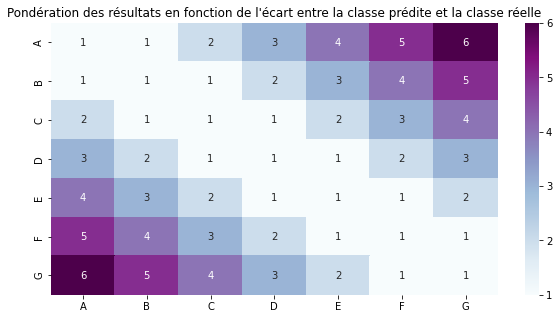

In [ ]:
mat_pond=pd.DataFrame({"A":[1,1,2,3,4,5,6],
             "B":[1,1,1,2,3,4,5],
             "C":[2,1,1,1,2,3,4],
              "D":[3,2,1,1,1,2,3],
              "E":[4,3,2,1,1,1,2],
              "F":[5,4,3,2,1,1,1],
              "G":[6,5,4,3,2,1,1]},
             index=['A','B','C','D','E','F','G'])
plt.figure(figsize = (10,5))
sns.heatmap(mat_pond, annot=True,
            xticklabels=mat_pond.columns,
            yticklabels=mat_pond.columns,
            cmap="BuPu");
plt.title("Pondération des résultats en fonction de l'écart entre la classe prédite et la classe réelle");

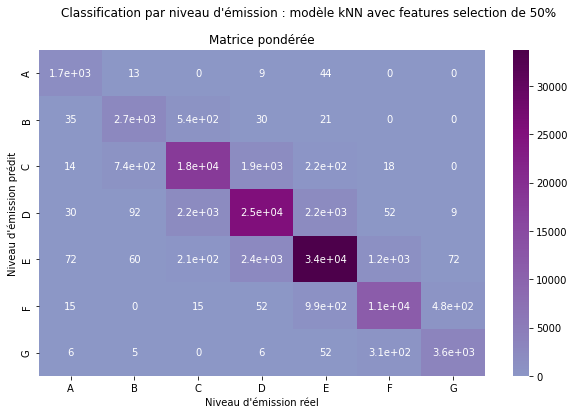

In [ ]:
ct=pd.crosstab(pred_knn_cl_test, cl_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])

for row in range(0,7):
  for col in range(0,7):
    X=abs(row-col)
    if X!=0:
      ct.iloc[row, col]=X*ct.iloc[row, col]

ct

plt.figure(figsize = (10,6))
sns.heatmap(ct, annot=True,
            xticklabels=ct.columns,
            yticklabels=ct.columns,
            cmap="BuPu", center=0.1);
plt.title("Matrice pondérée");
plt.suptitle("Classification par niveau d'émission : modèle kNN avec features selection de 50%");

In [ ]:
#calcul F1 score matrice "pondérée"
#Calcul des vrais positifs et des faux négatifs et faux positifs : 

TPFP=pd.DataFrame(ct.sum(axis=1))
TPFN=pd.DataFrame(ct.sum(axis=0))
df_scores=pd.DataFrame({'TP':[0,0,0,0,0,0,0]}, index=['A','B','C','D','E','F','G'])

for i in range(0,7):
  df_scores.iloc[i,0]=ct.iloc[i,i]

df_scores['TP+FP']=TPFP.iloc[:,0]
df_scores['TP+FN']=TPFN.iloc[:,0]
df_scores['precision']=round(df_scores['TP']/df_scores['TP+FP'],2)
df_scores['recall']=round(df_scores['TP']/df_scores['TP+FN'],2)
df_scores['f1']=round(2*(df_scores["precision"]*df_scores['recall'])/(df_scores['precision']+df_scores['recall']),2)
df_scores

TP  TP+FP  TP+FN  precision  recall    f1
A   1662   1728   1834       0.96    0.91  0.93
B   2665   3287   3577       0.81    0.75  0.78
C  18116  21055  21044       0.86    0.86  0.86
D  25472  30064  29945       0.85    0.85  0.85
E  33765  37841  37337       0.89    0.90  0.89
F  11412  12966  13021       0.88    0.88  0.88
G   3567   3946   4129       0.90    0.86  0.88

In [ ]:
df_scores.f1.mean()

0.8671428571428571

In [ ]:
#Essai en classification : autorisation de commercialiser le véhicule en 2030 ou non
pred_30_test=pd.cut(y_pred_knn2, bins=[0,123,np.inf], labels=ok2030)

ct30=pd.crosstab(pred_30_test, cl30_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])
ct30

Niveau d'émission réel     Oui     Non
Niveau d'émission prédit              
Oui                       6135     730
Non                       1012  106174

In [ ]:
print(classification_report(cl30_test,pred_30_test))

              precision    recall  f1-score   support

         Non       0.99      0.99      0.99    106904
         Oui       0.89      0.86      0.88      7147

    accuracy                           0.98    114051
   macro avg       0.94      0.93      0.93    114051
weighted avg       0.98      0.98      0.98    114051



### Loi Climat 2030


In [ ]:
#Essai en classification : autorisation de commercialiser le véhicule en 2030 ou non
pred_30_test=pd.cut(y_pred_knn2, bins=[0,123,np.inf], labels=ok2030)

ct30=pd.crosstab(pred_30_test, cl30_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])
ct30

Niveau d'émission réel     Oui     Non
Niveau d'émission prédit              
Oui                       6135     730
Non                       1012  106174

In [ ]:
accuracy_score(cl30_test, pred_30_test)

0.9847261312921413

In [ ]:
print(classification_report(cl30_test,pred_30_test))

              precision    recall  f1-score   support

         Non       0.99      0.99      0.99    106904
         Oui       0.89      0.86      0.88      7147

    accuracy                           0.98    114051
   macro avg       0.94      0.93      0.93    114051
weighted avg       0.98      0.98      0.98    114051



# Decision Tree

In [ ]:
#Pas besoin de scaling pour DT 

dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred=dt_reg.predict(X_test)

# sans CV
#Rappel : plus les valeurs sont basses, mieux c'est 
print('MAE:', round(mean_absolute_error(y_test,y_pred),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R² ensemble entrainement :", round(dt_reg.score(X_train, y_train),3))
print("R² ensemble test :",round(dt_reg.score(X_test, y_test),3))
 #Ecart entre les deux R² -> overfitting

MAE: 4.04
RMSE: 10.55
R² ensemble entrainement : 0.991
R² ensemble test : 0.935


In [ ]:
#Test d'autres hyperparamètres

param = {
    "max_depth": [3,5,10,15,20,25,30,50],
    "min_samples_split": [2,5,7, 10,20,40],
    "min_samples_leaf": [1,5,10,20]}

cv_dt=GridSearchCV(dt_reg,param_grid=param, scoring='neg_mean_squared_error', cv=3 )
cv_dt.fit(X_train, y_train);
cv_dt.best_params_

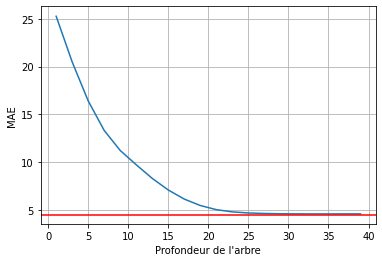

In [ ]:
#Tracé de MAE en fonction de profondeur de l'arbre afin de sélectionner la profondeur optimale
max_depth=range(1,40,2)
MAE_dt=[]
for i in max_depth:
  dt=DecisionTreeRegressor(max_depth=i, min_samples_leaf= 5, min_samples_split=7)
  dt.fit(X_train, y_train);
  y_pred=dt.predict(X_test)
  MAE_dt.append(mean_absolute_error(y_test,y_pred))
#Minimiser la profondeur de l'arbre permet d'éviter l'overfitting (et c'est moins long à tracer graphiquement)
plt.plot(max_depth,MAE_dt );
plt.xlabel("Profondeur de l'arbre");
plt.ylabel("MAE");
plt.grid(visible=True);
plt.axhline(y=4.5, color='r');
#-> Profondeur de 25 semble optimale

In [ ]:
dt_reg_CV=DecisionTreeRegressor(max_depth=30, min_samples_leaf= 5, min_samples_split=7)
dt_reg_CV.fit(X_train, y_train)

y_pred_CV=dt_reg_CV.predict(X_test)
print('MAE:', round(mean_absolute_error(y_test,y_pred_CV),2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_CV)),2))
print("R² ensemble entrainement :", round(dt_reg_CV.score(X_train, y_train),3))
print("R² ensemble test :",round(dt_reg_CV.score(X_test, y_test),3))

#C'est mieux au niveau overfiting

MAE: 4.62
RMSE: 9.7
R² ensemble entrainement : 0.968
R² ensemble test : 0.945


## Decision Tree : classification

In [ ]:
#Essai en "classification" : niveau d'émissions
pred_cl_CV_test=pd.cut(y_pred_CV,bins=[0,100,120,140,160,200,250,np.inf], labels=nv)

ct=pd.crosstab(pred_cl_CV_test, cl_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])
ct

Niveau d'émission réel       A     B      C      D      E      F     G
Niveau d'émission prédit                                              
A                         1626    10      3      7     13      4     1
B                           35  2620    441     23      7      1     0
C                           18   910  18943   2261    118      9     2
D                           13    38   2518  25895   2460     42     0
E                           20    25    138   2784  34494   1347    52
F                            3     2     10     22   1165  11430   580
G                            1     0      1      5     26    411  3517

In [ ]:
print(classification_report(cl_test,pred_cl_CV_test))

              precision    recall  f1-score   support

           A       0.98      0.95      0.96      1716
           B       0.84      0.73      0.78      3605
           C       0.85      0.86      0.85     22054
           D       0.84      0.84      0.84     30997
           E       0.89      0.90      0.89     38283
           F       0.87      0.86      0.86     13244
           G       0.89      0.85      0.87      4152

    accuracy                           0.86    114051
   macro avg       0.88      0.85      0.87    114051
weighted avg       0.86      0.86      0.86    114051



In [ ]:
 #Création cross tab pondérée : 
 #On donne plus d'importances aux erreurs lorsqu'il y a plus de 2 classes d'écart 

for row in range(0,7):
  for col in range(0,7):
    X=abs(row-col)
    if X>2 and X<5:
      ct.iloc[row, col]=2*ct.iloc[row, col]
    elif X>=5:
      ct.iloc[row,col]=3*ct.iloc[row, col]
ct

Niveau d'émission réel       A     B      C      D      E      F     G
Niveau d'émission prédit                                              
A                         1626    10      3     14     26     12     3
B                           35  2620    441     23     14      2     0
C                           18   910  18943   2261    118     18     4
D                           26    38   2518  25895   2460     42     0
E                           40    50    138   2784  34494   1347    52
F                            9     4     20     22   1165  11430   580
G                            3     0      2     10     26    411  3517

In [ ]:
#calcul F1 score matrice "pondérée"
#Calcul des vrais positifs et des faux négatifs et faux positifs : 

TPFP=pd.DataFrame(ct.sum(axis=1))
TPFN=pd.DataFrame(ct.sum(axis=0))
df_scores=pd.DataFrame({'TP':[0,0,0,0,0,0,0]}, index=['A','B','C','D','E','F','G'])

for i in range(0,7):
  df_scores.iloc[i,0]=ct.iloc[i,i]
df_scores['TP+FP']=TPFP.iloc[:,0]
df_scores['TP+FN']=TPFN.iloc[:,0]
df_scores['precision']=df_scores['TP']/df_scores['TP+FP']
df_scores['recall']=df_scores['TP']/df_scores['TP+FN']
df_scores['f1']=2*(df_scores["precision"]*df_scores['recall'])/(df_scores['precision']+df_scores['recall'])
df_scores

TP  TP+FP  TP+FN  precision    recall        f1
A   1626   1664   1716   0.977163  0.947552  0.962130
B   2620   3127   3605   0.837864  0.726768  0.778372
C  18943  22261  22054   0.850950  0.858937  0.854925
D  25895  30966  30997   0.836240  0.835403  0.835821
E  34494  38860  38283   0.887648  0.901027  0.894287
F  11430  13212  13244   0.865123  0.863032  0.864076
G   3517   3961   4152   0.887907  0.847062  0.867004

In [ ]:
#Essai en classification : autorisation de commercialiser le véhicule en 2030 ou non
pred_30_test=pd.cut(y_pred_CV, bins=[0,123,np.inf], labels=ok2030)

ct30=pd.crosstab(pred_30_test, cl30_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])
ct30

Niveau d'émission réel     Oui     Non
Niveau d'émission prédit              
Oui                       6012     764
Non                       1135  106140

In [ ]:
print(classification_report(cl30_test,pred_30_test))

              precision    recall  f1-score   support

         Non       0.99      0.99      0.99    106904
         Oui       0.89      0.84      0.86      7147

    accuracy                           0.98    114051
   macro avg       0.94      0.92      0.93    114051
weighted avg       0.98      0.98      0.98    114051



In [ ]:
#Test avec le jeu de données pour lequel on a conservé variable groupe :

dt_reg2=DecisionTreeRegressor()
dt_reg2.fit(X_train_grp, y_train_grp)

y_pred_grp=dt_reg2.predict(X_test_grp)
y_pred_train_grp=dt_reg2.predict(X_train_grp)
# sans CV
#Rappel : plus les valeurs sont basses, mieux c'est 
print('MAE:', mean_absolute_error(y_test_grp,y_pred_grp))
print('RMSE:', np.sqrt(mean_squared_error(y_test_grp, y_pred_grp)))
print("R² ensemble entrainement :", dt_reg2.score(X_train_grp, y_train_grp))
print("R² ensemble test :",dt_reg2.score(X_test_grp, y_test_grp))
 #Résultats très proche avec et sans groupe, mais MAE plus petit avec groupe

MAE: 3.8340396725360324
RMSE: 10.504462837877272
R² ensemble entrainement : 0.9913040055734555
R² ensemble test : 0.9341381178343171


In [ ]:
#Test d'autres hyperparamètres

param = {
    "max_depth": [3,5,10,15,20,30],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

cv_dt2=GridSearchCV(dt_reg2,param_grid=param, scoring='neg_mean_squared_error', cv=3 )
##Tester roc_auc dans scoring -> permet de limiter l'overfitting
cv_dt2.fit(X_train_grp, y_train_grp);

cv_dt2.best_params_
#La CV sélectionne toujours la profondeur d'arbre la plus grande, donc on va faire un graphe pour sélectionner graphiquement


{'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 7}

In [ ]:

dt_reg_CV2=DecisionTreeRegressor(max_depth=25, min_samples_leaf= 5, min_samples_split=7)
dt_reg_CV2.fit(X_train_grp, y_train_grp)

y_pred_CV_grp=dt_reg_CV2.predict(X_test_grp)
y_pred_CV_train_grp=dt_reg_CV2.predict(X_train_grp)

print('MAE:', mean_absolute_error(y_test_grp,y_pred_CV_grp))
#Comparer MAE sur train et test 
print('RMSE:', np.sqrt(mean_squared_error(y_test_grp, y_pred_CV_grp)))
print("R² ensemble entrainement :", dt_reg_CV2.score(X_train_grp, y_train_grp))
print("R² ensemble test :",dt_reg_CV2.score(X_test_grp, y_test_grp))

#En conservant les groupes, il semblerait qu'on ait un MAE légèrement inférieur (comparé aux résultats avec jeu de donnée sans groupes)
#Il y a également moins d'overfitting

MAE: 4.563740520055796
RMSE: 9.654217652152756
R² ensemble entrainement : 0.9679462768688097
R² ensemble test : 0.9449005197433478


In [ ]:
#Essai en "classification" : 
pred_cl_CV_test_grp=pd.cut(y_pred_CV_grp,bins=[0,100,120,140,160,200,250,np.inf], labels=nv)

pd.crosstab(pred_cl_CV_test_grp, cl_test_grp, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])

#Trouver une metrics pour évaluer les perf du modèle ?
#-> exemple : pénaliser si on saute de 2 classes 
#retrouver véhicules qui sont mal classifié -> nouvelle colonnes + filtre avec un loc


Niveau d'émission réel       A     B      C      D      E      F     G
Niveau d'émission prédit                                              
A                         1639    10      1      8     11      4     1
B                           30  2622    442     18      6      1     0
C                           15   918  18666   2189    127      6     2
D                           18    33   2788  25747   2328     40     0
E                            8    20    143   3009  34613   1281    38
F                            6     2     13     23   1167  11523   538
G                            0     0      1      3     31    389  3573

In [ ]:
print(classification_report(cl_test_grp,pred_cl_CV_test_grp))

              precision    recall  f1-score   support

           A       0.98      0.96      0.97      1716
           B       0.84      0.73      0.78      3605
           C       0.85      0.85      0.85     22054
           D       0.83      0.83      0.83     30997
           E       0.88      0.90      0.89     38283
           F       0.87      0.87      0.87     13244
           G       0.89      0.86      0.88      4152

    accuracy                           0.86    114051
   macro avg       0.88      0.86      0.87    114051
weighted avg       0.86      0.86      0.86    114051



# Random Forest

In [ ]:
# Modèle initial SANS GROUPE 

rf_reg=RandomForestRegressor(random_state=321)
rf_reg.fit(X_train, y_train)

y_pred_rf=rf_reg.predict(X_test)

print('MAE:', mean_absolute_error(y_test,y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("R² ensemble entrainement :", rf_reg.score(X_train, y_train))
print("R² ensemble test :",rf_reg.score(X_test, y_test))

MAE: 3.784281880233269
RMSE: 8.329930236291906
R² ensemble entrainement : 0.9868795292024853
R² ensemble test : 0.9594201308863797


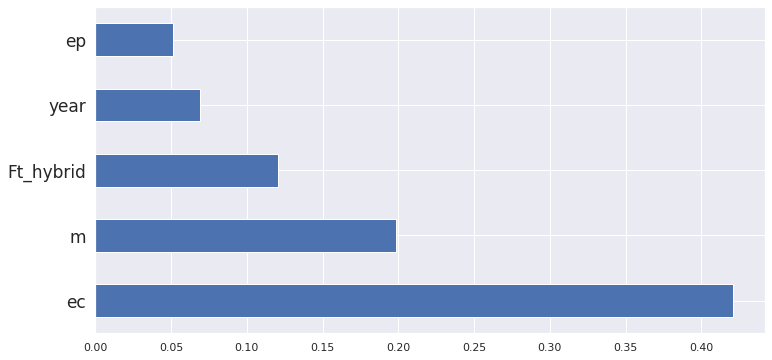

In [ ]:
feat_importances = pd.Series(
    rf_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

In [ ]:
# Nombre d'arbres
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Nombre de features
max_features = ['auto', 'sqrt']
# Max depth
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Min sample split
min_samples_split = [2, 5, 10]
# Min sample leaf
min_samples_leaf = [1, 2, 4]
# Boostrap
bootstrap = [True]
# Paramètres
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_1000_scaled, y_train_1000)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
# Modèle final avec les hyper-paramètres optimaux

rf_reg2=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features="auto",max_depth=20,random_state=321)
rf_reg2.fit(X_train, y_train)

y_pred_rf2=rf_reg2.predict(X_test)

print('MAE:', mean_absolute_error(y_test,y_pred_rf2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf2)))

print("R² ensemble entrainement :", rf_reg2.score(X_train, y_train))
print("R² ensemble test :",rf_reg2.score(X_test, y_test))

# Deep Learning


## Réseau 1

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=64,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=64,activation="relu")

# Instanciation dernière couche Dense
third_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
dnn_model=Model(inputs=inputs,outputs=x3)

In [ ]:
dnn_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_24 (Dense)            (None, 64)                1344      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 18s 2ms/step - loss: 13.5901 - val_loss: 11.4166
Epoch 2/50
8020/8020 [==============================] - 16s 2ms/step - loss: 11.2627 - val_loss: 11.0874
Epoch 3/50
8020/8020 [==============================] - 18s 2ms/step - loss: 11.0057 - val_loss: 10.8916
Epoch 4/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.8302 - val_loss: 10.7614
Epoch 5/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.7299 - val_loss: 10.6364
Epoch 6/50
8020/8020 [==============================] - 16s 2ms/step - loss: 10.6517 - val_loss: 10.5860
Epoch 7/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.5680 - val_loss: 10.5250
Epoch 8/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.4894 - val_loss: 10.4557
Epoch 9/50
8020/8020 [==============================] - 18s 2ms/step - loss: 10.4364 - val_loss: 10.5088
Epoch 10/50
8020/8020 [==============================] 

In [ ]:
list_mae_loss=(dnn_history.history['loss'])
list_mae_val_loss=(dnn_history.history['val_loss'])

In [ ]:
def plot_mae_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(min(list_mae_loss+list_mae_val_loss)-1,max(list_mae_loss+list_mae_val_loss)+1)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('MAE Evolution')
    plt.legend()
    plt.grid(True)

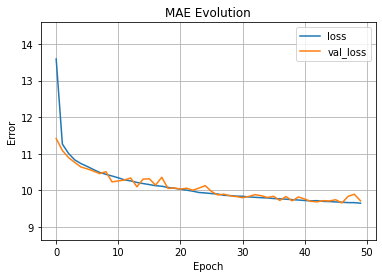

In [ ]:
# Evolution de la perte du modèle
plot_mae_loss(dnn_history)

In [ ]:
dnn_model.evaluate(X_test_scaled, y_test, verbose=0)

9.698552131652832

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=64,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=64,activation="relu")

# Instanciation dernière couche Dense
third_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
dnn_model=Model(inputs=inputs,outputs=x3)

In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 18s 2ms/step - loss: 559.2742 - val_loss: 296.6496
Epoch 2/50
8020/8020 [==============================] - 17s 2ms/step - loss: 275.7943 - val_loss: 286.0581
Epoch 3/50
8020/8020 [==============================] - 17s 2ms/step - loss: 261.9908 - val_loss: 269.5004
Epoch 4/50
8020/8020 [==============================] - 17s 2ms/step - loss: 252.2150 - val_loss: 255.4199
Epoch 5/50
8020/8020 [==============================] - 18s 2ms/step - loss: 247.7772 - val_loss: 251.7773
Epoch 6/50
8020/8020 [==============================] - 18s 2ms/step - loss: 243.6604 - val_loss: 249.8616
Epoch 7/50
8020/8020 [==============================] - 17s 2ms/step - loss: 241.9157 - val_loss: 256.3308
Epoch 8/50
8020/8020 [==============================] - 17s 2ms/step - loss: 239.8554 - val_loss: 242.7866
Epoch 9/50
8020/8020 [==============================] - 17s 2ms/step - loss: 238.0388 - val_loss: 242.6848
Epoch 10/50
8020/8020 [==============

In [ ]:
list_rmse_loss=np.sqrt(dnn_history.history['loss']).tolist()
list_rmse_val_loss=np.sqrt(dnn_history.history['val_loss']).tolist()

In [ ]:
def plot_rmse_loss(history):
    plt.plot(np.sqrt(history.history['loss']), label='loss')
    plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
    plt.ylim(min(list_rmse_loss+list_rmse_val_loss)-1,max(list_rmse_loss+list_rmse_val_loss)+1)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.title('RMSE evolution')
    plt.grid(True)

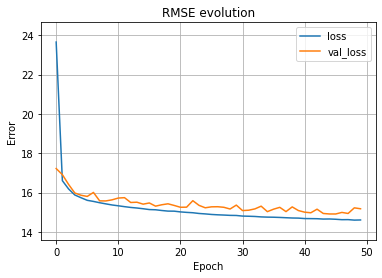

In [ ]:
# Evolution de la perte du modèle
plot_rmse_loss(dnn_history)

In [ ]:
np.sqrt(dnn_model.evaluate(X_test_scaled, y_test, verbose=0))

14.777816147782332

## Réseau 2


Idem que réseau 1 mais avec une couche de neurones en plus

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=64,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=64,activation="relu")

# Instanciaiton 3eme couche dense
third_layer=Dense(units=64,activation="relu")

# Instanciation dernière couche Dense
fourth_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
x4=fourth_layer(x3)
dnn_model_2=Model(inputs=inputs,outputs=x4)

dnn_model_2.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_81 (Dense)            (None, 64)                1344      
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dense_83 (Dense)            (None, 64)                4160      
                                                                 
 dense_84 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation du modèle
dnn_model_2.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model_2.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 19s 2ms/step - loss: 12.8037 - val_loss: 11.1730
Epoch 2/50
8020/8020 [==============================] - 17s 2ms/step - loss: 11.2713 - val_loss: 11.9369
Epoch 3/50
8020/8020 [==============================] - 17s 2ms/step - loss: 11.0309 - val_loss: 11.0162
Epoch 4/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.8693 - val_loss: 10.8983
Epoch 5/50
8020/8020 [==============================] - 22s 3ms/step - loss: 10.7219 - val_loss: 10.9032
Epoch 6/50
8020/8020 [==============================] - 19s 2ms/step - loss: 10.5788 - val_loss: 10.4476
Epoch 7/50
8020/8020 [==============================] - 18s 2ms/step - loss: 10.4858 - val_loss: 11.1899
Epoch 8/50
8020/8020 [==============================] - 19s 2ms/step - loss: 10.3914 - val_loss: 10.3786
Epoch 9/50
8020/8020 [==============================] - 20s 3ms/step - loss: 10.3127 - val_loss: 10.2008
Epoch 10/50
8020/8020 [==============================] 

In [ ]:
list_mae_loss=(dnn_history.history['loss'])
list_mae_val_loss=(dnn_history.history['val_loss'])

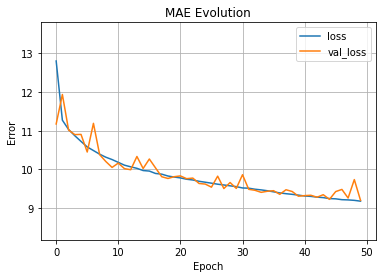

In [ ]:
# Evolution de la perte du modèle
plot_mae_loss(dnn_history)

In [ ]:
dnn_model_2.evaluate(X_test_scaled, y_test, verbose=0)

9.189603805541992

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=64,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=64,activation="relu")

# Instanciaiton 3eme couche dense
third_layer=Dense(units=64,activation="relu")

# Instanciation dernière couche Dense
fourth_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
x4=fourth_layer(x3)
dnn_model_2=Model(inputs=inputs,outputs=x4)

In [ ]:
# Compilation du modèle
dnn_model_2.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model_2.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 22s 3ms/step - loss: 461.3436 - val_loss: 280.0415
Epoch 2/50
8020/8020 [==============================] - 26s 3ms/step - loss: 271.5436 - val_loss: 269.8353
Epoch 3/50
8020/8020 [==============================] - 20s 2ms/step - loss: 261.2200 - val_loss: 265.9636
Epoch 4/50
8020/8020 [==============================] - 19s 2ms/step - loss: 255.4131 - val_loss: 251.2064
Epoch 5/50
8020/8020 [==============================] - 22s 3ms/step - loss: 249.5349 - val_loss: 255.3072
Epoch 6/50
8020/8020 [==============================] - 19s 2ms/step - loss: 244.6064 - val_loss: 253.6536
Epoch 7/50
8020/8020 [==============================] - 19s 2ms/step - loss: 241.5319 - val_loss: 245.5003
Epoch 8/50
8020/8020 [==============================] - 20s 2ms/step - loss: 238.8529 - val_loss: 243.6778
Epoch 9/50
8020/8020 [==============================] - 19s 2ms/step - loss: 236.7852 - val_loss: 251.5882
Epoch 10/50
8020/8020 [==============

In [ ]:
list_rmse_loss=np.sqrt(dnn_history.history['loss']).tolist()
list_rmse_val_loss=np.sqrt(dnn_history.history['val_loss']).tolist()

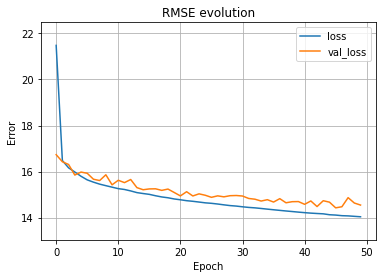

In [ ]:
# Evolution de la perte du modèle
plot_rmse_loss(dnn_history)

In [ ]:
np.sqrt(dnn_model_2.evaluate(X_test_scaled, y_test, verbose=0))

14.212466417204167

## Réseau 3

Réseau avec 1 couche cachée, et nombre de neurones = 2x(nombre de lots batchs)

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
layer_units=int(X_train_scaled.shape[0]/5000)
first_layer=Dense(units=layer_units,activation="relu")

# Instanciation dernière couche Dense
second_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
dnn_model=Model(inputs=inputs,outputs=x2)

dnn_model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_95 (Dense)            (None, 88)                1848      
                                                                 
 dense_96 (Dense)            (None, 1)                 89        
                                                                 
Total params: 1,937
Trainable params: 1,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 16s 2ms/step - loss: 16.6907 - val_loss: 11.9840
Epoch 2/50
8020/8020 [==============================] - 19s 2ms/step - loss: 11.7020 - val_loss: 11.5473
Epoch 3/50
8020/8020 [==============================] - 19s 2ms/step - loss: 11.4058 - val_loss: 11.3306
Epoch 4/50
8020/8020 [==============================] - 17s 2ms/step - loss: 11.2579 - val_loss: 11.2543
Epoch 5/50
8020/8020 [==============================] - 16s 2ms/step - loss: 11.1510 - val_loss: 11.1103
Epoch 6/50
8020/8020 [==============================] - 16s 2ms/step - loss: 11.0731 - val_loss: 11.1480
Epoch 7/50
8020/8020 [==============================] - 16s 2ms/step - loss: 11.0152 - val_loss: 11.0044
Epoch 8/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.9689 - val_loss: 10.9828
Epoch 9/50
8020/8020 [==============================] - 17s 2ms/step - loss: 10.9231 - val_loss: 10.9364
Epoch 10/50
8020/8020 [==============================] 

In [ ]:
list_mae_loss=(dnn_history.history['loss'])
list_mae_val_loss=(dnn_history.history['val_loss'])

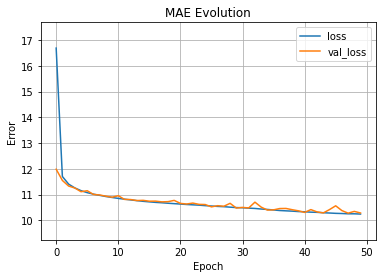

In [ ]:
# Evolution de la perte du modèle
plot_mae_loss(dnn_history)

In [ ]:
dnn_model.evaluate(X_test_scaled, y_test, verbose=0)

10.270256996154785

## Réseau 4

Même réseau que réseau 1 mais avec le double de neurones par couche cachée

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=128,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=128,activation="relu")

# Instanciation dernière couche Dense
third_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
dnn_model=Model(inputs=inputs,outputs=x3)

dnn_model.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_97 (Dense)            (None, 128)               2688      
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 dense_99 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,329
Trainable params: 19,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 111s 14ms/step - loss: 13.2662 - val_loss: 12.0307
Epoch 2/50
8020/8020 [==============================] - 20s 2ms/step - loss: 11.5523 - val_loss: 11.3971
Epoch 3/50
8020/8020 [==============================] - 19s 2ms/step - loss: 11.2451 - val_loss: 11.0005
Epoch 4/50
8020/8020 [==============================] - 19s 2ms/step - loss: 10.9473 - val_loss: 11.2054
Epoch 5/50
8020/8020 [==============================] - 19s 2ms/step - loss: 10.7496 - val_loss: 10.6642
Epoch 6/50
8020/8020 [==============================] - 18s 2ms/step - loss: 10.5964 - val_loss: 10.5561
Epoch 7/50
8020/8020 [==============================] - 21s 3ms/step - loss: 10.5018 - val_loss: 11.1590
Epoch 8/50
8020/8020 [==============================] - 19s 2ms/step - loss: 10.4158 - val_loss: 10.3416
Epoch 9/50
8020/8020 [==============================] - 18s 2ms/step - loss: 10.3256 - val_loss: 10.3832
Epoch 10/50
8020/8020 [==============================

In [ ]:
list_mae_loss=(dnn_history.history['loss'])
list_mae_val_loss=(dnn_history.history['val_loss'])

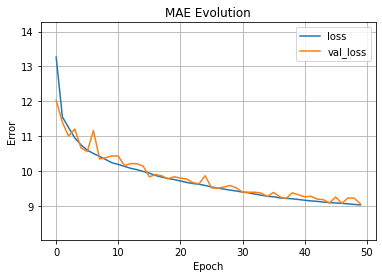

In [ ]:
# Evolution de la perte du modèle
plot_mae_loss(dnn_history)

In [ ]:
dnn_model.evaluate(X_test_scaled, y_test, verbose=0)

9.07041072845459

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=128,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=128,activation="relu")

# Instanciation dernière couche Dense
third_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
dnn_model=Model(inputs=inputs,outputs=x3)


In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=50,batch_size=batch,validation_split=0.2)

Epoch 1/50
8020/8020 [==============================] - 22s 3ms/step - loss: 473.1395 - val_loss: 298.3940
Epoch 2/50
8020/8020 [==============================] - 20s 2ms/step - loss: 272.9596 - val_loss: 280.5111
Epoch 3/50
8020/8020 [==============================] - 21s 3ms/step - loss: 261.5626 - val_loss: 279.6131
Epoch 4/50
8020/8020 [==============================] - 20s 2ms/step - loss: 253.6291 - val_loss: 251.3754
Epoch 5/50
8020/8020 [==============================] - 20s 2ms/step - loss: 247.4097 - val_loss: 253.7688
Epoch 6/50
8020/8020 [==============================] - 19s 2ms/step - loss: 242.4190 - val_loss: 245.1093
Epoch 7/50
8020/8020 [==============================] - 18s 2ms/step - loss: 237.9125 - val_loss: 238.8543
Epoch 8/50
8020/8020 [==============================] - 18s 2ms/step - loss: 233.6434 - val_loss: 237.5322
Epoch 9/50
8020/8020 [==============================] - 16s 2ms/step - loss: 230.6688 - val_loss: 251.9505
Epoch 10/50
8020/8020 [==============

In [ ]:
list_rmse_loss=np.sqrt(dnn_history.history['loss']).tolist()
list_rmse_val_loss=np.sqrt(dnn_history.history['val_loss']).tolist()

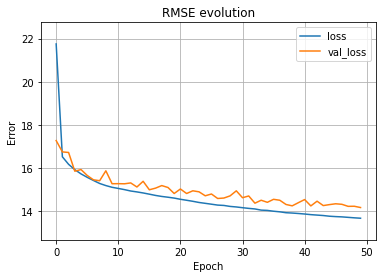

In [ ]:
# Evolution de la perte du modèle
plot_rmse_loss(dnn_history)

In [ ]:
np.sqrt(dnn_model.evaluate(X_test_scaled, y_test, verbose=0))

13.892008486186345

## Réseau 5

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=150,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=150,activation="relu")

# Instanciaiton 3eme couche dense
third_layer=Dense(units=150,activation="relu")

# Instanciation dernière couche Dense
fourth_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
x4=fourth_layer(x3)
dnn_model=Model(inputs=inputs,outputs=x4)

dnn_model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_103 (Dense)           (None, 150)               3150      
                                                                 
 dense_104 (Dense)           (None, 150)               22650     
                                                                 
 dense_105 (Dense)           (None, 150)               22650     
                                                                 
 dense_106 (Dense)           (None, 1)                 151       
                                                                 
Total params: 48,601
Trainable params: 48,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=150,batch_size=batch,validation_split=0.2)

Epoch 1/150
8020/8020 [==============================] - 28s 3ms/step - loss: 12.2801 - val_loss: 11.0927
Epoch 2/150
8020/8020 [==============================] - 24s 3ms/step - loss: 11.0364 - val_loss: 10.7095
Epoch 3/150
8020/8020 [==============================] - 24s 3ms/step - loss: 10.7174 - val_loss: 10.3385
Epoch 4/150
8020/8020 [==============================] - 23s 3ms/step - loss: 10.5331 - val_loss: 10.7417
Epoch 5/150
8020/8020 [==============================] - 27s 3ms/step - loss: 10.3532 - val_loss: 10.1458
Epoch 6/150
8020/8020 [==============================] - 27s 3ms/step - loss: 10.2063 - val_loss: 10.5898
Epoch 7/150
8020/8020 [==============================] - 25s 3ms/step - loss: 10.0752 - val_loss: 10.1327
Epoch 8/150
8020/8020 [==============================] - 25s 3ms/step - loss: 9.9943 - val_loss: 10.3667
Epoch 9/150
8020/8020 [==============================] - 27s 3ms/step - loss: 9.9093 - val_loss: 9.8607
Epoch 10/150
8020/8020 [=========================

In [ ]:
list_mae_loss=(dnn_history.history['loss'])
list_mae_val_loss=(dnn_history.history['val_loss'])

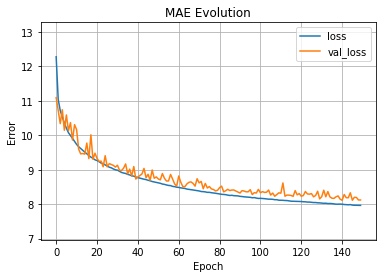

In [ ]:
# Evolution de la perte du modèle
plot_mae_loss(dnn_history)

In [ ]:
dnn_model.evaluate(X_test_scaled, y_test, verbose=0)

8.097270965576172

In [ ]:
# Instanciation couche entrée
inputs=Input(shape=X_train_scaled.shape[1])

# Instanciation 1ere couche dense
first_layer=Dense(units=150,activation="relu")

# Instanciation 2eme couche dense
second_layer=Dense(units=150,activation="relu")

# Instanciaiton 3eme couche dense
third_layer=Dense(units=150,activation="relu")

# Instanciation dernière couche Dense
fourth_layer=Dense(units=1) 

# Ajout au modèle
x1=first_layer(inputs)
x2=second_layer(x1)
x3=third_layer(x2)
x4=fourth_layer(x3)
dnn_model=Model(inputs=inputs,outputs=x4)

In [ ]:
# Compilation du modèle
dnn_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017))

# Entrainement du modèle
batch=int(X_train_scaled.shape[0]/10000)
dnn_history=dnn_model.fit(X_train_scaled,y_train,epochs=150,batch_size=batch,validation_split=0.2)

Epoch 1/150
8020/8020 [==============================] - 27s 3ms/step - loss: 380.6547 - val_loss: 281.5208
Epoch 2/150
8020/8020 [==============================] - 29s 4ms/step - loss: 265.0759 - val_loss: 267.7437
Epoch 3/150
8020/8020 [==============================] - 27s 3ms/step - loss: 253.1499 - val_loss: 248.9812
Epoch 4/150
8020/8020 [==============================] - 25s 3ms/step - loss: 243.3876 - val_loss: 239.6598
Epoch 5/150
8020/8020 [==============================] - 25s 3ms/step - loss: 237.8391 - val_loss: 235.2066
Epoch 6/150
8020/8020 [==============================] - 25s 3ms/step - loss: 232.7926 - val_loss: 233.5828
Epoch 7/150
8020/8020 [==============================] - 27s 3ms/step - loss: 228.6782 - val_loss: 236.3811
Epoch 8/150
8020/8020 [==============================] - 26s 3ms/step - loss: 225.9830 - val_loss: 232.3622
Epoch 9/150
8020/8020 [==============================] - 23s 3ms/step - loss: 223.3633 - val_loss: 228.3901
Epoch 10/150
8020/8020 [====

In [ ]:
list_rmse_loss=np.sqrt(dnn_history.history['loss']).tolist()
list_rmse_val_loss=np.sqrt(dnn_history.history['val_loss']).tolist()

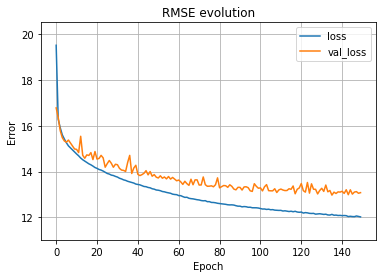

In [ ]:
# Evolution de la perte du modèle
plot_rmse_loss(dnn_history)

In [ ]:
np.sqrt(dnn_model.evaluate(X_test_scaled, y_test, verbose=0))

12.610241412303036

# Stacking Regressor

In [ ]:
knn2=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')
rf_reg2=RandomForestRegressor(random_state=321,max_depth=8,max_features="auto")
dt_reg2=DecisionTreeRegressor(max_depth=25, min_samples_leaf= 5, min_samples_split=7)

sr1 = StackingRegressor(estimators=[('knn', knn2), ('rf', rf_reg2), ('dt', dt_reg2)], final_estimator=knn2)
sr1.fit(X_train_100_scaled, y_train_100)
y_pred_sr1=sr1.predict(X_test_100_scaled) 

sr2 = StackingRegressor(estimators=[('knn', knn2), ('rf', rf_reg2), ('dt', dt_reg2)], final_estimator=rf_reg2)
sr2.fit(X_train_100_scaled, y_train_100)
y_pred_sr2=sr2.predict(X_test_100_scaled) 

sr3 = StackingRegressor(estimators=[('knn', knn2), ('rf', rf_reg2), ('dt', dt_reg2)], final_estimator=dt_reg2)
sr3.fit(X_train_100_scaled, y_train_100)
y_pred_sr3=sr3.predict(X_test_100_scaled) 

print('MAE knn:', mean_absolute_error(y_test_100,y_pred_sr1))
print('RMSE knn:', np.sqrt(mean_squared_error(y_test_100, y_pred_sr1)))
print("R² ensemble entrainement knn:", sr1.score(X_train_100_scaled, y_train_100))
print("R² ensemble test knn:",sr1.score(X_test_100_scaled, y_test_100),"\n")

print('MAE rf:', mean_absolute_error(y_test_100,y_pred_sr2))
print('RMSE rf:', np.sqrt(mean_squared_error(y_test_100, y_pred_sr2)))
print("R² ensemble entrainement rf:", sr2.score(X_train_100_scaled, y_train_100))
print("R² ensemble test rf:",sr2.score(X_test_100_scaled, y_test_100),"\n")

print('MAE dt:', mean_absolute_error(y_test_100,y_pred_sr3))
print('RMSE dt:', np.sqrt(mean_squared_error(y_test_100, y_pred_sr3)))
print("R² ensemble entrainement dt:", sr3.score(X_train_100_scaled, y_train_100))
print("R² ensemble test dt:",sr3.score(X_test_100_scaled, y_test_100))

MAE knn: 20.844151520329245
RMSE knn: 31.845108589947646
R² ensemble entrainement knn: 0.8201347070080801
R² ensemble test knn: 0.7719864475933074 

MAE rf: 20.560540606411582
RMSE rf: 25.277858299128827
R² ensemble entrainement rf: 0.8834963549988403
R² ensemble test rf: 0.856333423611807 

MAE dt: 33.969175982246156
RMSE dt: 56.40106004086745
R² ensemble entrainement dt: 0.6764794878681587
R² ensemble test dt: 0.2847634073402109


On a lancé 3 stacking, avec comme estimateurs finaux respectivement KNN / RF / DT.
Le meilleur stacking semble être celui avec comme estimateur final Random Forest.
On relance ainsi un stacking sur base de donnée complète avec feature selection à 75% et comme estimateur final Random Forest

In [ ]:
knn2=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')
rf_reg2=RandomForestRegressor(random_state=321,max_depth=8,max_features="auto")
dt_reg2=DecisionTreeRegressor(max_depth=25, min_samples_leaf= 5, min_samples_split=7)

sr = StackingRegressor(estimators=[('knn', knn2), ('rf', rf_reg2), ('dt', dt_reg2)], final_estimator=rf_reg2)
sr.fit(X_train_scaled_75, y_train)
y_pred_sr=sr.predict(X_test_scaled_75) 


print('MAE:', mean_absolute_error(y_test,y_pred_sr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_sr)))
print("R² ensemble entrainement :", sr.score(X_train_scaled_75, y_train))
print("R² ensemble test :",sr.score(X_test_scaled_75, y_test))

MAE: 4.13245335496952
RMSE: 8.74231062370055
R² ensemble entrainement : 0.9830298842269003
R² ensemble test : 0.9543817200158944


In [ ]:
knn2=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')
rf_reg2=RandomForestRegressor(random_state=321,max_depth=8,max_features="auto")
dt_reg2=DecisionTreeRegressor(max_depth=25, min_samples_leaf= 5, min_samples_split=7)

sr = StackingRegressor(estimators=[('knn', knn2), ('rf', rf_reg2), ('dt', dt_reg2)], final_estimator=rf_reg2)
sr.fit(X_train_scaled, y_train)
y_pred_sr=sr.predict(X_test_scaled) 


print('MAE:', mean_absolute_error(y_test,y_pred_sr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_sr)))
print("R² ensemble entrainement :", sr.score(X_train_scaled, y_train))
print("R² ensemble test :",sr.score(X_test_scaled, y_test))

MAE: 4.085029962026475
RMSE: 8.759046120440583
R² ensemble entrainement : 0.9823029779671164
R² ensemble test : 0.9546448134951508


## Stacking Reg / Classification



In [ ]:
y_pred_cl_sr_test=pd.cut(y_pred_sr,bins=[0,100,120,140,160,200,250,np.inf], labels=nv)

pd.crosstab(y_pred_cl_sr_test, cl_test, rownames=["Niveau d'émission prédit"],colnames=["Niveau d'émission réel"])

Niveau d'émission réel       A     B      C      D      E      F     G
Niveau d'émission prédit                                              
A                         1626     6      0      5     10      3     1
B                           49  2546    339      6      3      0     0
C                           12  1010  19010   1883     84      2     1
D                           11    28   2590  26327   2060     25     0
E                           13    14    111   2759  35108   1309    33
F                            4     1      3     14   1006  11624   590
G                            1     0      1      3     12    281  3527

In [ ]:
print(classification_report(cl_test,y_pred_cl_sr_test))

              precision    recall  f1-score   support

           A       0.98      0.95      0.97      1716
           B       0.87      0.71      0.78      3605
           C       0.86      0.86      0.86     22054
           D       0.85      0.85      0.85     30997
           E       0.89      0.92      0.90     38283
           F       0.88      0.88      0.88     13244
           G       0.92      0.85      0.88      4152

    accuracy                           0.87    114051
   macro avg       0.89      0.86      0.87    114051
weighted avg       0.87      0.87      0.87    114051



# Interprétabilités des modèles

## Ciblage par groupe 


In [ ]:
#On récupère une variable groupe pour faire une analyse locale, et on filtre le groupe : 
def grp_filter(X, grp):
  X['grp']=X.index
  X['model']=X['grp'].apply(lambda x: x.split(' - ')[1])
  X['grp']=X['grp'].apply(lambda x: x.split(' - ')[0])
  X=X[X['grp']==grp]
  X=X.drop(['grp','model'], axis=1)
  return X

X_renault_train=grp_filter(X_train, "RENAULT NISSAN")
X_renault_train_scaled=grp_filter(X_train_scaled, "RENAULT NISSAN")

X_renault_train_1000_scaled=X_renault_train_scaled.sample(n=1000)
display(X_renault_train_1000_scaled.head())
X_renault_train_1000_scaled.shape

X_train=X_train.drop(['grp','model'], axis=1)
X_train_scaled=X_train_scaled.drop(['grp','model'], axis=1)


m         W       At1       At2  \
RENAULT NISSAN - DOKKER         -0.968079  0.434437 -0.577452 -0.995999   
RENAULT NISSAN - LOGAN          -1.612843 -0.338862 -0.541467 -0.900432   
RENAULT NISSAN - MEGANE         -0.862747 -0.308106 -0.188808 -0.171738   
RENAULT NISSAN - SANDERO        -1.670297 -0.536581 -0.541467 -0.900432   
RENAULT NISSAN - NISSAN QASHQAI -0.368002 -0.286137 -0.088048 -0.016442   

                                       ec        ep      year  Ct_M1  Ct_M1G  \
RENAULT NISSAN - DOKKER         -0.384419 -1.076447 -0.455021    1.0     0.0   
RENAULT NISSAN - LOGAN          -1.319616 -1.203137  0.709588    1.0     0.0   
RENAULT NISSAN - MEGANE         -0.598312 -0.714476 -1.037326    1.0     0.0   
RENAULT NISSAN - SANDERO        -1.477304 -1.304221 -0.163869    1.0     0.0   
RENAULT NISSAN - NISSAN QASHQAI -0.384419 -0.442998  0.418435    1.0     0.0   

                                 Ct_N1  Ct_N1G  Ft_diesel  Ft_e85  Ft_hybrid  \
RENAULT NISSAN - DOKKER            0.0     0.0        0.0     0.0        0.0   
RENAULT NISSAN - LOGAN             0.0     0.0        0.0     0.0        0.0   
RENAULT NISSAN - MEGANE            0.0     0.0        1.0     0.0        0.0   
RENAULT NISSAN - SANDERO           0.0     0.0        0.0     0.0        0.0   
RENAULT NISSAN - NISSAN QASHQAI    0.0     0.0        1.0     0.0        0.0   

                                 Ft_lpg  Ft_ng  Ft_petrol  Fm_B  Fm_F  Fm_M  
RENAULT NISSAN - DOKKER             0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - LOGAN              0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - MEGANE             0.0    0.0        0.0   0.0   0.0   1.0  
RENAULT NISSAN - SANDERO            0.0    0.0        1.0   0.0   0.0   1.0  
RENAULT NISSAN - NISSAN QASHQAI     0.0    0.0        0.0   0.0   0.0   1.0

In [ ]:
#On récupère une variable groupe pour faire une analyse locale, et on filtre le groupe : 
def grp_model_filter(X, grp, model):
  X['grp']=X.index
  X['model']=X['grp'].apply(lambda x: x.split(' - ')[1])
  X['grp']=X['grp'].apply(lambda x: x.split(' - ')[0])
  X=X[X['grp']==grp]
  X=X[X['model']==model]
  X=X.drop(['grp','model'], axis=1)
  return X

X_renault_clio_test=grp_model_filter(X_test, "RENAULT NISSAN", "CLIO")
X_test=X_test.drop(['grp','model'], axis=1)

## Interprétation KNN


In [ ]:
# Instanciation KNN
knn=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')

# Entrainement
knn.fit(X_train_1000_scaled ,y_train_1000)

KNeighborsRegressor(p=1, weights='distance')

### Interprétation Globale avec Shap

#### Interprétation sur 1000 échantillons aléatoires

In [ ]:
# Instanciation d'un explainer
explainer = shap.KernelExplainer(knn.predict,X_train_1000_scaled)
# Calcul des valeurs Shap
shap_values = explainer.shap_values(X_test_1000_scaled)

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


  0%|          | 0/200 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The defau

In [ ]:
shap.initjs()

# Représentation d'une prédiction sur la base de test

shap_values_0 = explainer.shap_values(X_test_1000_scaled.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values_0, X_test_1000_scaled.iloc[0,:])

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


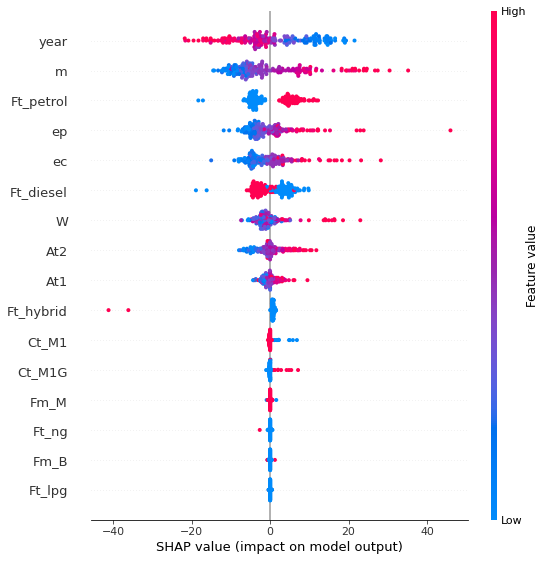

In [ ]:
# Représentation de toutes les prédiction de la base test

#shap_values = explainer.shap_values(X_test_1000_scaled)
shap.summary_plot(shap_values, X_test_1000_scaled)

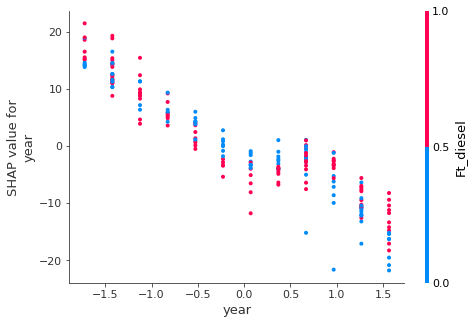

In [ ]:
shap.dependence_plot("year", shap_values, X_test_1000_scaled)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_test_1000_scaled)

#### Interprétation sur base complète avec feature selection à 50%

In [ ]:
# --------------------------------------- KNN Regressor Optimisé -------------------------------------------

# Instanciation KNN
knn5=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance', algorithm= 'auto')

# Entrainement
knn5.fit(X_train_scaled_50 ,y_train)


KNeighborsRegressor(p=1, weights='distance')

In [ ]:
# Instanciation d'un explainer
explainer2 = shap.SamplingExplainer(knn5.predict,X_train_scaled_50) # SamplingExmplainer alternative à KernelExplainer

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


In [ ]:
# Calcul des valeurs Shap
shap_values2 = explainer2.shap_values(X_train_scaled_50.iloc[0:1000,:], nsamples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
shap.initjs()

# Représentation d'une prédiction sur la base de test

shap_values = explainer.shap_values(X_train_scaled_50.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values,X_test_scaled_50.iloc[0,:])

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

In [ ]:
# Représentation de toutes les prédiction de la base test
'''
Trop long. 30minutes pour obtenir 15 valeurs. Soit 37h pour en obtenir 1000.

shap_values = explainer.shap_values(X_test_scaled_50.iloc[0:1000,:], nsamples=1000)
shap.summary_plot(shap_values, X_test_scaled_50.iloc[0:1000,:])
'''


  0%|          | 0/1000 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

KeyboardInterrupt: ignored

### Interprétation Locale avec Shap

  0%|          | 0/22 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The defau

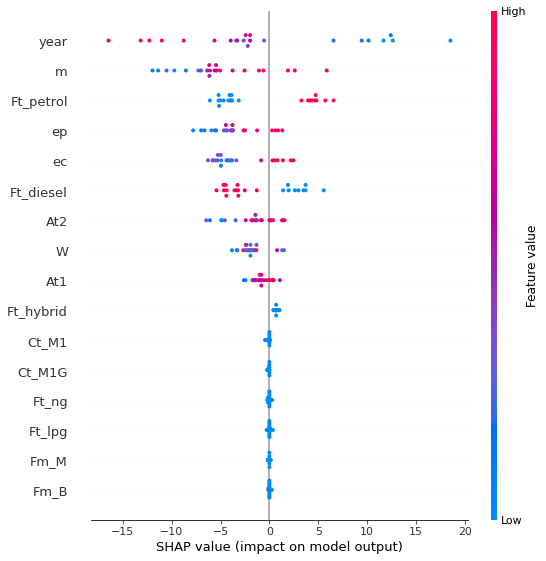

In [ ]:
shap.initjs()

# Représentation de toutes les prédictions de la base test de la marque Renault
groupe_renault=grp_filter(X_test_1000_scaled, "RENAULT NISSAN")
shap_values_renault = explainer.shap_values(groupe_renault)
shap.summary_plot(shap_values_renault, groupe_renault)

  0%|          | 0/21 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The defau

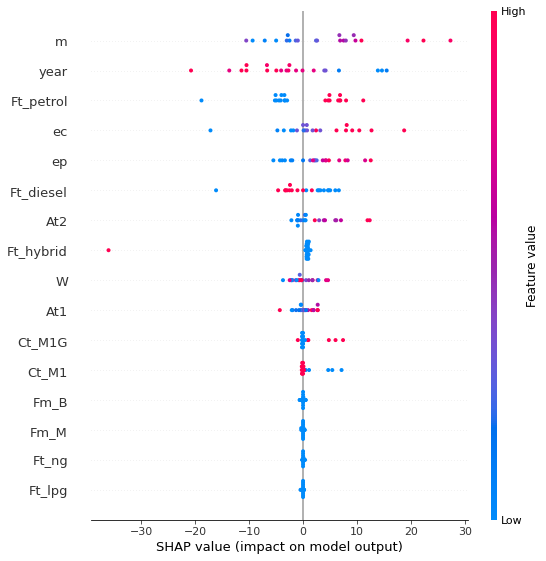

In [ ]:
# Représentation de toutes les prédictions de la base test BMW
groupe_bmw=grp_filter(X_test_1000_scaled, "BMW GROUP")
shap_values_bmw = explainer.shap_values(groupe_bmw)
shap.summary_plot(shap_values_bmw, groupe_bmw)

## Interprétation Decision Tree


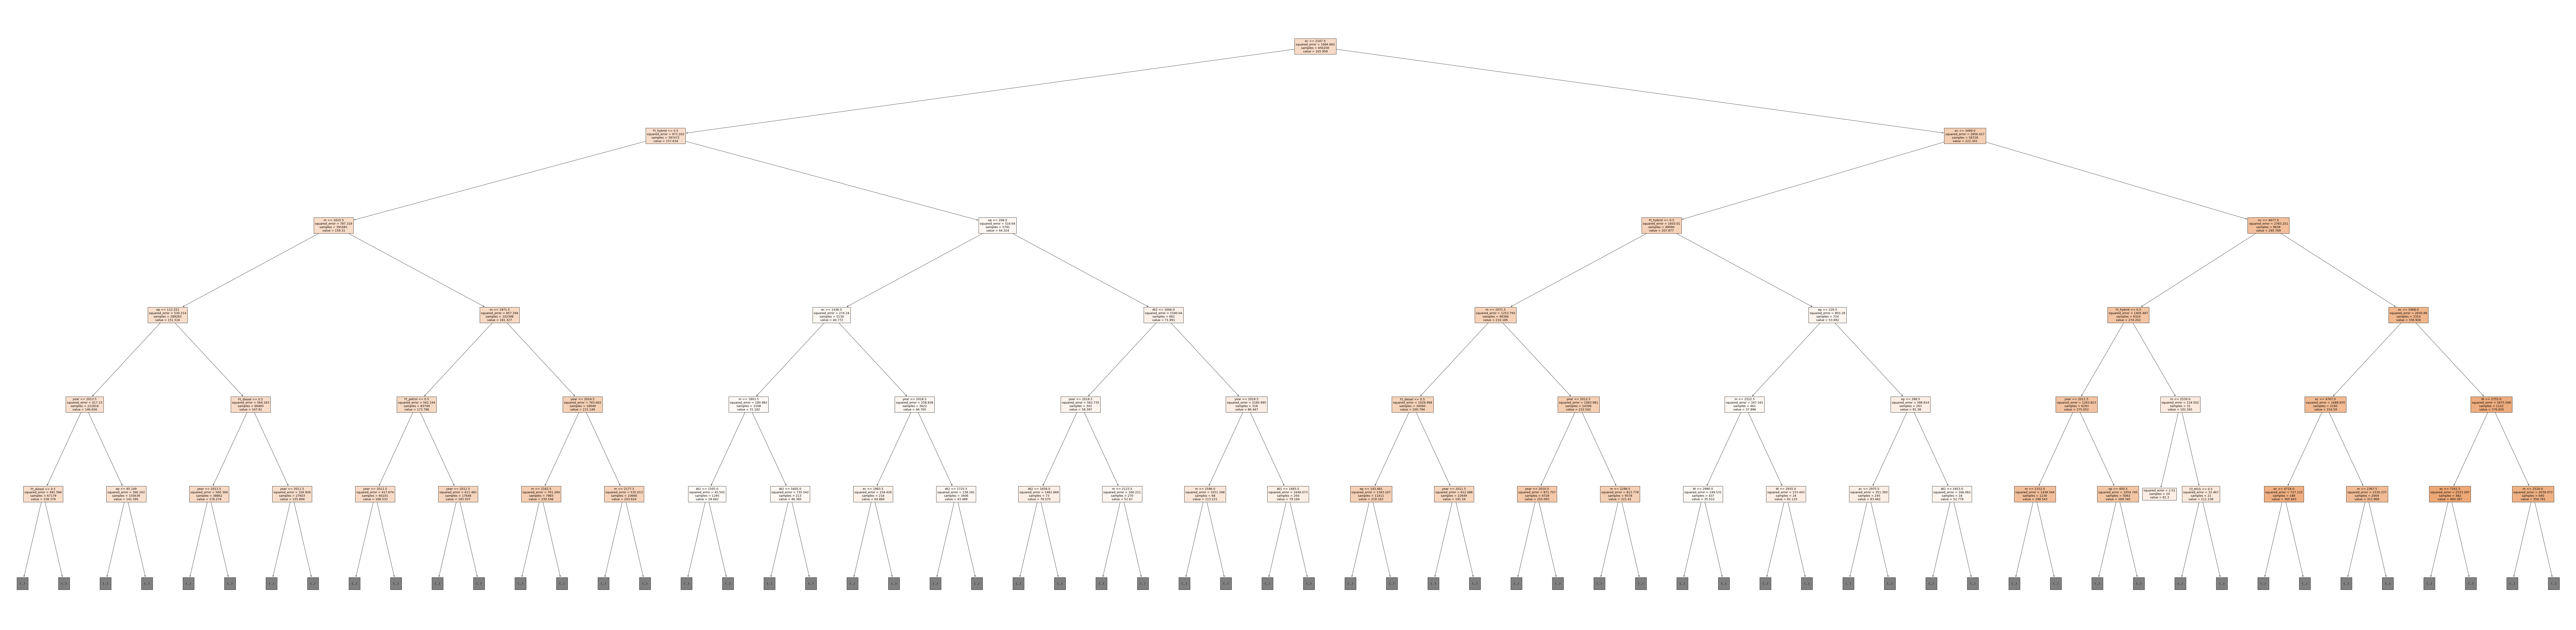

In [ ]:
##Interprétation de modèle : 
#Plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(200,50))
plot_tree(dt_reg_CV, feature_names = X_train.columns.tolist(),max_depth=5, filled=True); #proportion=True

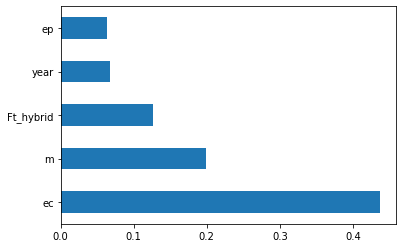

In [ ]:
feat_importances = pd.Series(
    dt_reg_CV.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

In [ ]:
X

In [ ]:

explainer = shap.TreeExplainer(dt_reg_CV)

shap_values = explainer.shap_values(X_renault_clio_test)

print('Expected Value:', explainer.expected_value)

pd.DataFrame(shap_values).head()


Expected Value: [165.95913095]


0         1         2         3          4         5         6   \
0 -23.187732 -4.152529  0.670654  1.974523 -10.424212 -6.349568  3.415613   
1   3.432876  3.636900 -5.118445  2.438062  -4.619279  9.890765 -5.008255   
2  -0.176906  4.952555 -1.461410  0.042450  -6.390510  6.028107 -7.217375   
3 -12.417164  2.947884  0.176609  1.407009   9.159886 -1.555898 -0.132719   
4  -7.272241 -0.978115  2.592876  0.850773  28.822429  3.587436 -5.687814   

         7         8    9    10         11        12        13        14  \
0 -0.003533 -0.000749  0.0  0.0 -11.153585 -0.000853  1.212298 -0.057492   
1 -0.004234 -0.030820  0.0  0.0   3.867299  0.000169  1.838442 -0.022552   
2 -0.008527 -0.014787  0.0  0.0  -9.269734 -0.000829  1.509795 -0.020678   
3 -0.006397 -0.005996  0.0  0.0   3.410744 -0.000856  1.568550 -0.020820   
4 -0.013543 -0.012714  0.0  0.0  -8.050153 -0.000863  1.501817 -0.006188   

         15        16        17        18        19  
0  0.029367 -3.048756  0.005616  0.000202 -0.000176  
1  0.016838  8.667161  0.004838  0.000197  0.000138  
2  0.016488 -1.094485  0.003367  0.000269  0.000340  
3  0.011935  6.581016 -0.011895  0.000312 -0.012143  
4  0.006221 -1.841553  0.003216  0.000286 -0.000358

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[70,:], X_renault_clio_test.iloc[70,:])

In [ ]:
explainer = shap.TreeExplainer(dt_reg_CV, feature_names = X_train.columns.tolist(),max_depth=5, filled=True)
shap_values = explainer.shap_values(X_renault_clio_test)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

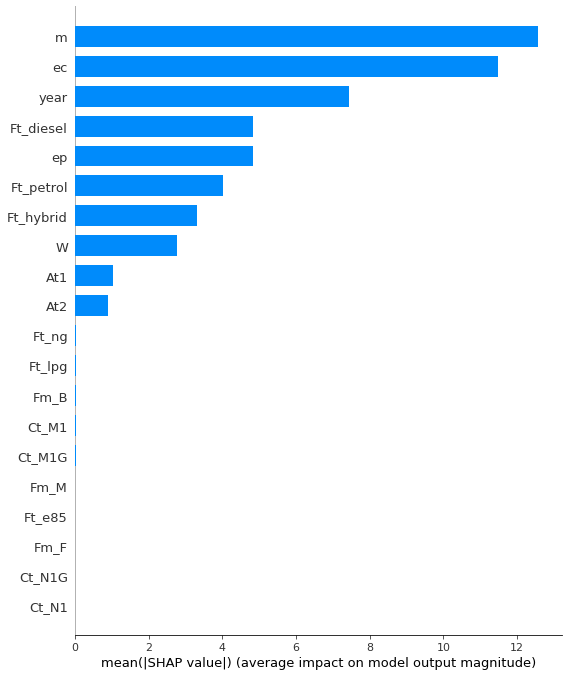

In [ ]:
shap.summary_plot(shap_values,X_train, plot_type="bar")

# Malus

In [ ]:
#Objectif : calculer la variable "malus" (en €), en fonction de la variable Ewltp
y_test_grp2 = y_test_grp*2
y_test_grp.head()


VW GROUP - ATECA               192.000000
OTHERS - 6 SPORT NAV D AUTO    156.513418
HYUNDAI MOTOR - CARENS         153.311480
DAIMLER - B 200 CDI            163.984607
DAIMLER - E 220 CDI            160.782669
Name: Ewltp, dtype: float64

In [ ]:
y_pred

array([191.19364561, 155.13040446, 156.87950677, ..., 160.82339958,
       197.17091909, 191.16499181])

In [ ]:
#Création d'une nouvelle variable malus : 
malus_test_grp = []
for row in y_test_grp:
  if row <= 127 :   malus_test_grp.append(0)
  elif 127 < row <= 128:  malus_test_grp.append(50)
  elif 128 < row <= 129:  malus_test_grp.append(75)
  elif 129 < row <= 130:  malus_test_grp.append(100)
  elif 130 < row <= 131:  malus_test_grp.append(125)
  elif 131 < row <= 132:  malus_test_grp.append(150)
  elif 132 < row <= 133:  malus_test_grp.append(170)
  elif 133 < row <= 134:  malus_test_grp.append(190)
  elif 134 < row <= 135:  malus_test_grp.append(210)
  elif 135 < row <= 136:  malus_test_grp.append(230)
  elif 136 < row <= 137:  malus_test_grp.append(240)
  elif 137 < row <= 138:  malus_test_grp.append(260)
  elif 138 < row <= 139:  malus_test_grp.append(280)
  elif 139 < row <= 140:  malus_test_grp.append(310)
  elif 140 < row <= 141:  malus_test_grp.append(330)
  elif 141 < row <= 142:  malus_test_grp.append(360)
  elif 142 < row <= 143:  malus_test_grp.append(400)
  elif 143 < row <= 144:  malus_test_grp.append(450)
  elif 144 < row <= 145:  malus_test_grp.append(540)
  elif 145 < row <= 146:  malus_test_grp.append(650)
  elif 146 < row <= 147:  malus_test_grp.append(740)
  elif 147 < row <= 148:  malus_test_grp.append(818)
  elif 148 < row <= 149:  malus_test_grp.append(898)
  elif 149 < row <= 150:  malus_test_grp.append(983)
  elif 150 < row <= 151:  malus_test_grp.append(1074)
  elif 151 < row <= 152:  malus_test_grp.append(1172)
  elif 152 < row <= 153:  malus_test_grp.append(1276)
  elif 153 < row <= 154:  malus_test_grp.append(1386)
  elif 154 < row <= 155:  malus_test_grp.append(1504)
  elif 155 < row <= 156:  malus_test_grp.append(1629)
  elif 156 < row <= 157:  malus_test_grp.append(1761)
  elif 157 < row <= 158:  malus_test_grp.append(1901)
  elif 158 < row <= 159:  malus_test_grp.append(2049)
  elif 159 < row <= 160:  malus_test_grp.append(2205)
  elif 160 < row <= 161:  malus_test_grp.append(2370)    
  elif 161 < row <= 162:  malus_test_grp.append(2544)    
  elif 162 < row <= 163:  malus_test_grp.append(2726)    
  elif 163 < row <= 164:  malus_test_grp.append(2918)    
  elif 164 < row <= 165:  malus_test_grp.append(3119)    
  elif 165 < row <= 166:  malus_test_grp.append(3331)    
  elif 166 < row <= 167:  malus_test_grp.append(3552)    
  elif 167 < row <= 168:  malus_test_grp.append(3784)    
  elif 168 < row <= 169:  malus_test_grp.append(4026)    
  elif 169 < row <= 170:  malus_test_grp.append(4279)    
  elif 170 < row <= 171:  malus_test_grp.append(4543)    
  elif 171 < row <= 172:  malus_test_grp.append(4818)    
  elif 172 < row <= 173:  malus_test_grp.append(5105)    
  elif 173 < row <= 174:  malus_test_grp.append(5404)
  elif 174 < row <= 175:  malus_test_grp.append(5715)
  elif 175 < row <= 176:  malus_test_grp.append(6039)
  elif 176 < row <= 177:  malus_test_grp.append(6375)
  elif 177 < row <= 178:  malus_test_grp.append(6724)
  elif 178 < row <= 179:  malus_test_grp.append(7086)
  elif 179 < row <= 180:  malus_test_grp.append(7462)
  elif 180 < row <= 181:  malus_test_grp.append(7851)
  elif 181 < row <= 182:  malus_test_grp.append(8254)
  elif 182 < row <= 183:  malus_test_grp.append(8671)
  elif 183 < row <= 184:  malus_test_grp.append(9103)
  elif 184 < row <= 185:  malus_test_grp.append(9550)
  elif 185 < row <= 186:  malus_test_grp.append(10011)
  elif 186 < row <= 187:  malus_test_grp.append(10488)
  elif 187 < row <= 188:  malus_test_grp.append(10980)
  elif 188 < row <= 189:  malus_test_grp.append(11488)
  elif 189 < row <= 190:  malus_test_grp.append(12012)
  elif 190 < row <= 191:  malus_test_grp.append(12552)
  elif 191 < row <= 192:  malus_test_grp.append(13109)  
  elif 192 < row <= 193:  malus_test_grp.append(13682)  
  elif 193 < row <= 194:  malus_test_grp.append(14276)  
  elif 194 < row <= 195:  malus_test_grp.append(14881)  
  elif 195 < row <= 196:  malus_test_grp.append(15506)  
  elif 196 < row <= 197:  malus_test_grp.append(16149)  
  elif 197 < row <= 198:  malus_test_grp.append(16810)  
  elif 198 < row <= 199:  malus_test_grp.append(17490)  
  elif 199 < row <= 200:  malus_test_grp.append(18188)  
  elif 200 < row <= 201:  malus_test_grp.append(18905)  
  elif 201 < row <= 202:  malus_test_grp.append(19641)  
  elif 202 < row <= 203:  malus_test_grp.append(20396)  
  elif 203 < row <= 204:  malus_test_grp.append(21171)
  elif 204 < row <= 205:  malus_test_grp.append(21966)
  elif 205 < row <= 206:  malus_test_grp.append(22781)
  elif 206 < row <= 207:  malus_test_grp.append(23616)
  elif 207 < row <= 208:  malus_test_grp.append(24472)
  elif 208 < row <= 209:  malus_test_grp.append(25349)
  elif 209 < row <= 210:  malus_test_grp.append(26247)
  elif 210 < row <= 211:  malus_test_grp.append(27166)
  elif 211 < row <= 212:  malus_test_grp.append(28107)
  elif 212 < row <= 213:  malus_test_grp.append(29070)
  elif 213 < row <= 214:  malus_test_grp.append(30056)
  elif 214 < row <= 215:  malus_test_grp.append(31063)
  elif 215 < row <= 216:  malus_test_grp.append(32094)
  elif 216 < row <= 217:  malus_test_grp.append(33147)
  elif 217 < row <= 218:  malus_test_grp.append(34224)
  elif 218 < row <= 219:  malus_test_grp.append(35324)
  elif 219 < row <= 220:  malus_test_grp.append(36447)
  elif 220 < row <= 221:  malus_test_grp.append(37595)
  elif 221 < row <= 222:  malus_test_grp.append(38767)
  elif 222 < row <= 223:  malus_test_grp.append(39964)
  elif  row > 223:  malus_test_grp.append(40000)

malus = []
for row in y_pred:
  if row <= 127 :   malus.append(0)
  elif 127 < row <= 128:  malus.append(50)
  elif 128 < row <= 129:  malus.append(75)
  elif 129 < row <= 130:  malus.append(100)
  elif 130 < row <= 131:  malus.append(125)
  elif 131 < row <= 132:  malus.append(150)
  elif 132 < row <= 133:  malus.append(170)
  elif 133 < row <= 134:  malus.append(190)
  elif 134 < row <= 135:  malus.append(210)
  elif 135 < row <= 136:  malus.append(230)
  elif 136 < row <= 137:  malus.append(240)
  elif 137 < row <= 138:  malus.append(260)
  elif 138 < row <= 139:  malus.append(280)
  elif 139 < row <= 140:  malus.append(310)
  elif 140 < row <= 141:  malus.append(330)
  elif 141 < row <= 142:  malus.append(360)
  elif 142 < row <= 143:  malus.append(400)
  elif 143 < row <= 144:  malus.append(450)
  elif 144 < row <= 145:  malus.append(540)
  elif 145 < row <= 146:  malus.append(650)
  elif 146 < row <= 147:  malus.append(740)
  elif 147 < row <= 148:  malus.append(818)
  elif 148 < row <= 149:  malus.append(898)
  elif 149 < row <= 150:  malus.append(983)
  elif 150 < row <= 151:  malus.append(1074)
  elif 151 < row <= 152:  malus.append(1172)
  elif 152 < row <= 153:  malus.append(1276)
  elif 153 < row <= 154:  malus.append(1386)
  elif 154 < row <= 155:  malus.append(1504)
  elif 155 < row <= 156:  malus.append(1629)
  elif 156 < row <= 157:  malus.append(1761)
  elif 157 < row <= 158:  malus.append(1901)
  elif 158 < row <= 159:  malus.append(2049)
  elif 159 < row <= 160:  malus.append(2205)
  elif 160 < row <= 161:  malus.append(2370)    
  elif 161 < row <= 162:  malus.append(2544)    
  elif 162 < row <= 163:  malus.append(2726)    
  elif 163 < row <= 164:  malus.append(2918)    
  elif 164 < row <= 165:  malus.append(3119)    
  elif 165 < row <= 166:  malus.append(3331)    
  elif 166 < row <= 167:  malus.append(3552)    
  elif 167 < row <= 168:  malus.append(3784)    
  elif 168 < row <= 169:  malus.append(4026)    
  elif 169 < row <= 170:  malus.append(4279)    
  elif 170 < row <= 171:  malus.append(4543)    
  elif 171 < row <= 172:  malus.append(4818)    
  elif 172 < row <= 173:  malus.append(5105)    
  elif 173 < row <= 174:  malus.append(5404)
  elif 174 < row <= 175:  malus.append(5715)
  elif 175 < row <= 176:  malus.append(6039)
  elif 176 < row <= 177:  malus.append(6375)
  elif 177 < row <= 178:  malus.append(6724)
  elif 178 < row <= 179:  malus.append(7086)
  elif 179 < row <= 180:  malus.append(7462)
  elif 180 < row <= 181:  malus.append(7851)
  elif 181 < row <= 182:  malus.append(8254)
  elif 182 < row <= 183:  malus.append(8671)
  elif 183 < row <= 184:  malus.append(9103)
  elif 184 < row <= 185:  malus.append(9550)
  elif 185 < row <= 186:  malus.append(10011)
  elif 186 < row <= 187:  malus.append(10488)
  elif 187 < row <= 188:  malus.append(10980)
  elif 188 < row <= 189:  malus.append(11488)
  elif 189 < row <= 190:  malus.append(12012)
  elif 190 < row <= 191:  malus.append(12552)
  elif 191 < row <= 192:  malus.append(13109)  
  elif 192 < row <= 193:  malus.append(13682)  
  elif 193 < row <= 194:  malus.append(14276)  
  elif 194 < row <= 195:  malus.append(14881)  
  elif 195 < row <= 196:  malus.append(15506)  
  elif 196 < row <= 197:  malus.append(16149)  
  elif 197 < row <= 198:  malus.append(16810)  
  elif 198 < row <= 199:  malus.append(17490)  
  elif 199 < row <= 200:  malus.append(18188)  
  elif 200 < row <= 201:  malus.append(18905)  
  elif 201 < row <= 202:  malus.append(19641)  
  elif 202 < row <= 203:  malus.append(20396)  
  elif 203 < row <= 204:  malus.append(21171)
  elif 204 < row <= 205:  malus.append(21966)
  elif 205 < row <= 206:  malus.append(22781)
  elif 206 < row <= 207:  malus.append(23616)
  elif 207 < row <= 208:  malus.append(24472)
  elif 208 < row <= 209:  malus.append(25349)
  elif 209 < row <= 210:  malus.append(26247)
  elif 210 < row <= 211:  malus.append(27166)
  elif 211 < row <= 212:  malus.append(28107)
  elif 212 < row <= 213:  malus.append(29070)
  elif 213 < row <= 214:  malus.append(30056)
  elif 214 < row <= 215:  malus.append(31063)
  elif 215 < row <= 216:  malus.append(32094)
  elif 216 < row <= 217:  malus.append(33147)
  elif 217 < row <= 218:  malus.append(34224)
  elif 218 < row <= 219:  malus.append(35324)
  elif 219 < row <= 220:  malus.append(36447)
  elif 220 < row <= 221:  malus.append(37595)
  elif 221 < row <= 222:  malus.append(38767)
  elif 222 < row <= 223:  malus.append(39964)
  elif  row > 223:  malus.append(40000)

malus_knn2 = []
for row in y_pred_knn2:
  if row <= 127 :   malus_knn2.append(0)
  elif 127 < row <= 128:  malus_knn2.append(50)
  elif 128 < row <= 129:  malus_knn2.append(75)
  elif 129 < row <= 130:  malus_knn2.append(100)
  elif 130 < row <= 131:  malus_knn2.append(125)
  elif 131 < row <= 132:  malus_knn2.append(150)
  elif 132 < row <= 133:  malus_knn2.append(170)
  elif 133 < row <= 134:  malus_knn2.append(190)
  elif 134 < row <= 135:  malus_knn2.append(210)
  elif 135 < row <= 136:  malus_knn2.append(230)
  elif 136 < row <= 137:  malus_knn2.append(240)
  elif 137 < row <= 138:  malus_knn2.append(260)
  elif 138 < row <= 139:  malus_knn2.append(280)
  elif 139 < row <= 140:  malus_knn2.append(310)
  elif 140 < row <= 141:  malus_knn2.append(330)
  elif 141 < row <= 142:  malus_knn2.append(360)
  elif 142 < row <= 143:  malus_knn2.append(400)
  elif 143 < row <= 144:  malus_knn2.append(450)
  elif 144 < row <= 145:  malus_knn2.append(540)
  elif 145 < row <= 146:  malus_knn2.append(650)
  elif 146 < row <= 147:  malus_knn2.append(740)
  elif 147 < row <= 148:  malus_knn2.append(818)
  elif 148 < row <= 149:  malus_knn2.append(898)
  elif 149 < row <= 150:  malus_knn2.append(983)
  elif 150 < row <= 151:  malus_knn2.append(1074)
  elif 151 < row <= 152:  malus_knn2.append(1172)
  elif 152 < row <= 153:  malus_knn2.append(1276)
  elif 153 < row <= 154:  malus_knn2.append(1386)
  elif 154 < row <= 155:  malus_knn2.append(1504)
  elif 155 < row <= 156:  malus_knn2.append(1629)
  elif 156 < row <= 157:  malus_knn2.append(1761)
  elif 157 < row <= 158:  malus_knn2.append(1901)
  elif 158 < row <= 159:  malus_knn2.append(2049)
  elif 159 < row <= 160:  malus_knn2.append(2205)
  elif 160 < row <= 161:  malus_knn2.append(2370)    
  elif 161 < row <= 162:  malus_knn2.append(2544)    
  elif 162 < row <= 163:  malus_knn2.append(2726)    
  elif 163 < row <= 164:  malus_knn2.append(2918)    
  elif 164 < row <= 165:  malus_knn2.append(3119)    
  elif 165 < row <= 166:  malus_knn2.append(3331)    
  elif 166 < row <= 167:  malus_knn2.append(3552)    
  elif 167 < row <= 168:  malus_knn2.append(3784)    
  elif 168 < row <= 169:  malus_knn2.append(4026)    
  elif 169 < row <= 170:  malus_knn2.append(4279)    
  elif 170 < row <= 171:  malus_knn2.append(4543)    
  elif 171 < row <= 172:  malus_knn2.append(4818)    
  elif 172 < row <= 173:  malus_knn2.append(5105)    
  elif 173 < row <= 174:  malus_knn2.append(5404)
  elif 174 < row <= 175:  malus_knn2.append(5715)
  elif 175 < row <= 176:  malus_knn2.append(6039)
  elif 176 < row <= 177:  malus_knn2.append(6375)
  elif 177 < row <= 178:  malus_knn2.append(6724)
  elif 178 < row <= 179:  malus_knn2.append(7086)
  elif 179 < row <= 180:  malus_knn2.append(7462)
  elif 180 < row <= 181:  malus_knn2.append(7851)
  elif 181 < row <= 182:  malus_knn2.append(8254)
  elif 182 < row <= 183:  malus_knn2.append(8671)
  elif 183 < row <= 184:  malus_knn2.append(9103)
  elif 184 < row <= 185:  malus_knn2.append(9550)
  elif 185 < row <= 186:  malus_knn2.append(10011)
  elif 186 < row <= 187:  malus_knn2.append(10488)
  elif 187 < row <= 188:  malus_knn2.append(10980)
  elif 188 < row <= 189:  malus_knn2.append(11488)
  elif 189 < row <= 190:  malus_knn2.append(12012)
  elif 190 < row <= 191:  malus_knn2.append(12552)
  elif 191 < row <= 192:  malus_knn2.append(13109)  
  elif 192 < row <= 193:  malus_knn2.append(13682)  
  elif 193 < row <= 194:  malus_knn2.append(14276)  
  elif 194 < row <= 195:  malus_knn2.append(14881)  
  elif 195 < row <= 196:  malus_knn2.append(15506)  
  elif 196 < row <= 197:  malus_knn2.append(16149)  
  elif 197 < row <= 198:  malus_knn2.append(16810)  
  elif 198 < row <= 199:  malus_knn2.append(17490)  
  elif 199 < row <= 200:  malus_knn2.append(18188)  
  elif 200 < row <= 201:  malus_knn2.append(18905)  
  elif 201 < row <= 202:  malus_knn2.append(19641)  
  elif 202 < row <= 203:  malus_knn2.append(20396)  
  elif 203 < row <= 204:  malus_knn2.append(21171)
  elif 204 < row <= 205:  malus_knn2.append(21966)
  elif 205 < row <= 206:  malus_knn2.append(22781)
  elif 206 < row <= 207:  malus_knn2.append(23616)
  elif 207 < row <= 208:  malus_knn2.append(24472)
  elif 208 < row <= 209:  malus_knn2.append(25349)
  elif 209 < row <= 210:  malus_knn2.append(26247)
  elif 210 < row <= 211:  malus_knn2.append(27166)
  elif 211 < row <= 212:  malus_knn2.append(28107)
  elif 212 < row <= 213:  malus_knn2.append(29070)
  elif 213 < row <= 214:  malus_knn2.append(30056)
  elif 214 < row <= 215:  malus_knn2.append(31063)
  elif 215 < row <= 216:  malus_knn2.append(32094)
  elif 216 < row <= 217:  malus_knn2.append(33147)
  elif 217 < row <= 218:  malus_knn2.append(34224)
  elif 218 < row <= 219:  malus_knn2.append(35324)
  elif 219 < row <= 220:  malus_knn2.append(36447)
  elif 220 < row <= 221:  malus_knn2.append(37595)
  elif 221 < row <= 222:  malus_knn2.append(38767)
  elif 222 < row <= 223:  malus_knn2.append(39964)
  elif  row > 223:  malus_knn2.append(40000)

malus_dt_pred = []
for row in y_pred_CV_grp:
  if row <= 127 :   malus_dt_pred.append(0)
  elif 127 < row <= 128:  malus_dt_pred.append(50)
  elif 128 < row <= 129:  malus_dt_pred.append(75)
  elif 129 < row <= 130:  malus_dt_pred.append(100)
  elif 130 < row <= 131:  malus_dt_pred.append(125)
  elif 131 < row <= 132:  malus_dt_pred.append(150)
  elif 132 < row <= 133:  malus_dt_pred.append(170)
  elif 133 < row <= 134:  malus_dt_pred.append(190)
  elif 134 < row <= 135:  malus_dt_pred.append(210)
  elif 135 < row <= 136:  malus_dt_pred.append(230)
  elif 136 < row <= 137:  malus_dt_pred.append(240)
  elif 137 < row <= 138:  malus_dt_pred.append(260)
  elif 138 < row <= 139:  malus_dt_pred.append(280)
  elif 139 < row <= 140:  malus_dt_pred.append(310)
  elif 140 < row <= 141:  malus_dt_pred.append(330)
  elif 141 < row <= 142:  malus_dt_pred.append(360)
  elif 142 < row <= 143:  malus_dt_pred.append(400)
  elif 143 < row <= 144:  malus_dt_pred.append(450)
  elif 144 < row <= 145:  malus_dt_pred.append(540)
  elif 145 < row <= 146:  malus_dt_pred.append(650)
  elif 146 < row <= 147:  malus_dt_pred.append(740)
  elif 147 < row <= 148:  malus_dt_pred.append(818)
  elif 148 < row <= 149:  malus_dt_pred.append(898)
  elif 149 < row <= 150:  malus_dt_pred.append(983)
  elif 150 < row <= 151:  malus_dt_pred.append(1074)
  elif 151 < row <= 152:  malus_dt_pred.append(1172)
  elif 152 < row <= 153:  malus_dt_pred.append(1276)
  elif 153 < row <= 154:  malus_dt_pred.append(1386)
  elif 154 < row <= 155:  malus_dt_pred.append(1504)
  elif 155 < row <= 156:  malus_dt_pred.append(1629)
  elif 156 < row <= 157:  malus_dt_pred.append(1761)
  elif 157 < row <= 158:  malus_dt_pred.append(1901)
  elif 158 < row <= 159:  malus_dt_pred.append(2049)
  elif 159 < row <= 160:  malus_dt_pred.append(2205)
  elif 160 < row <= 161:  malus_dt_pred.append(2370)    
  elif 161 < row <= 162:  malus_dt_pred.append(2544)    
  elif 162 < row <= 163:  malus_dt_pred.append(2726)    
  elif 163 < row <= 164:  malus_dt_pred.append(2918)    
  elif 164 < row <= 165:  malus_dt_pred.append(3119)    
  elif 165 < row <= 166:  malus_dt_pred.append(3331)    
  elif 166 < row <= 167:  malus_dt_pred.append(3552)    
  elif 167 < row <= 168:  malus_dt_pred.append(3784)    
  elif 168 < row <= 169:  malus_dt_pred.append(4026)    
  elif 169 < row <= 170:  malus_dt_pred.append(4279)    
  elif 170 < row <= 171:  malus_dt_pred.append(4543)    
  elif 171 < row <= 172:  malus_dt_pred.append(4818)    
  elif 172 < row <= 173:  malus_dt_pred.append(5105)    
  elif 173 < row <= 174:  malus_dt_pred.append(5404)
  elif 174 < row <= 175:  malus_dt_pred.append(5715)
  elif 175 < row <= 176:  malus_dt_pred.append(6039)
  elif 176 < row <= 177:  malus_dt_pred.append(6375)
  elif 177 < row <= 178:  malus_dt_pred.append(6724)
  elif 178 < row <= 179:  malus_dt_pred.append(7086)
  elif 179 < row <= 180:  malus_dt_pred.append(7462)
  elif 180 < row <= 181:  malus_dt_pred.append(7851)
  elif 181 < row <= 182:  malus_dt_pred.append(8254)
  elif 182 < row <= 183:  malus_dt_pred.append(8671)
  elif 183 < row <= 184:  malus_dt_pred.append(9103)
  elif 184 < row <= 185:  malus_dt_pred.append(9550)
  elif 185 < row <= 186:  malus_dt_pred.append(10011)
  elif 186 < row <= 187:  malus_dt_pred.append(10488)
  elif 187 < row <= 188:  malus_dt_pred.append(10980)
  elif 188 < row <= 189:  malus_dt_pred.append(11488)
  elif 189 < row <= 190:  malus_dt_pred.append(12012)
  elif 190 < row <= 191:  malus_dt_pred.append(12552)
  elif 191 < row <= 192:  malus_dt_pred.append(13109)  
  elif 192 < row <= 193:  malus_dt_pred.append(13682)  
  elif 193 < row <= 194:  malus_dt_pred.append(14276)  
  elif 194 < row <= 195:  malus_dt_pred.append(14881)  
  elif 195 < row <= 196:  malus_dt_pred.append(15506)  
  elif 196 < row <= 197:  malus_dt_pred.append(16149)  
  elif 197 < row <= 198:  malus_dt_pred.append(16810)  
  elif 198 < row <= 199:  malus_dt_pred.append(17490)  
  elif 199 < row <= 200:  malus_dt_pred.append(18188)  
  elif 200 < row <= 201:  malus_dt_pred.append(18905)  
  elif 201 < row <= 202:  malus_dt_pred.append(19641)  
  elif 202 < row <= 203:  malus_dt_pred.append(20396)  
  elif 203 < row <= 204:  malus_dt_pred.append(21171)
  elif 204 < row <= 205:  malus_dt_pred.append(21966)
  elif 205 < row <= 206:  malus_dt_pred.append(22781)
  elif 206 < row <= 207:  malus_dt_pred.append(23616)
  elif 207 < row <= 208:  malus_dt_pred.append(24472)
  elif 208 < row <= 209:  malus_dt_pred.append(25349)
  elif 209 < row <= 210:  malus_dt_pred.append(26247)
  elif 210 < row <= 211:  malus_dt_pred.append(27166)
  elif 211 < row <= 212:  malus_dt_pred.append(28107)
  elif 212 < row <= 213:  malus_dt_pred.append(29070)
  elif 213 < row <= 214:  malus_dt_pred.append(30056)
  elif 214 < row <= 215:  malus_dt_pred.append(31063)
  elif 215 < row <= 216:  malus_dt_pred.append(32094)
  elif 216 < row <= 217:  malus_dt_pred.append(33147)
  elif 217 < row <= 218:  malus_dt_pred.append(34224)
  elif 218 < row <= 219:  malus_dt_pred.append(35324)
  elif 219 < row <= 220:  malus_dt_pred.append(36447)
  elif 220 < row <= 221:  malus_dt_pred.append(37595)
  elif 221 < row <= 222:  malus_dt_pred.append(38767)
  elif 222 < row <= 223:  malus_dt_pred.append(39964)
  elif  row > 223:  malus_dt_pred.append(40000)



In [ ]:
print('MAE:', mean_absolute_error(malus_test_grp,malus))
print('RMSE:', np.sqrt(mean_squared_error(malus_test_grp,malus)))

MAE: 922.6330676627123
RMSE: 2631.2636337775175


In [ ]:
print('MAE:', mean_absolute_error(malus_test_grp,malus_knn2))
print('RMSE:', np.sqrt(mean_squared_error(malus_test_grp,malus_knn2)))

MAE: 991.8377480250064
RMSE: 3006.050310461722


In [ ]:
print('MAE:', mean_absolute_error(malus_test_grp,malus_dt_pred))
print('RMSE:', np.sqrt(mean_squared_error(malus_test_grp,malus_dt_pred)))

MAE: 1131.6583019877073
RMSE: 3167.914532392941


In [ ]:
def malus_calcul(variable):
  variable_malus = []
  for row in variable:
   if row <= 127 :   variable_malus.append(0)
   elif 127 < row <= 128:  variable_malus.append(50)
   elif 128 < row <= 129:  variable_malus.append(75)
   elif 129 < row <= 130:  variable_malus.append(100)
   elif 130 < row <= 131:  variable_malus.append(125)
   elif 131 < row <= 132:  variable_malus.append(150)
   elif 132 < row <= 133:  variable_malus.append(170)
   elif 133 < row <= 134:  variable_malus.append(190)
   elif 134 < row <= 135:  variable_malus.append(210)
   elif 135 < row <= 136:  variable_malus.append(230)
   elif 136 < row <= 137:  variable_malus.append(240)
   elif 137 < row <= 138:  variable_malus.append(260)
   elif 138 < row <= 139:  variable_malus.append(280)
   elif 139 < row <= 140:  variable_malus.append(310)
   elif 140 < row <= 141:  variable_malus.append(330)
   elif 141 < row <= 142:  variable_malus.append(360)
   elif 142 < row <= 143:  variable_malus.append(400)
   elif 143 < row <= 144:  variable_malus.append(450)
   elif 144 < row <= 145:  variable_malus.append(540)
   elif 145 < row <= 146:  variable_malus.append(650)
   elif 146 < row <= 147:  variable_malus.append(740)
   elif 147 < row <= 148:  variable_malus.append(818)
   elif 148 < row <= 149:  variable_malus.append(898)
   elif 149 < row <= 150:  variable_malus.append(983)
   elif 150 < row <= 151:  variable_malus.append(1074)
   elif 151 < row <= 152:  variable_malus.append(1172)
   elif 152 < row <= 153:  variable_malus.append(1276)
   elif 153 < row <= 154:  variable_malus.append(1386)
   elif 154 < row <= 155:  variable_malus.append(1504)
   elif 155 < row <= 156:  variable_malus.append(1629)
   elif 156 < row <= 157:  variable_malus.append(1761)
   elif 157 < row <= 158:  variable_malus.append(1901)
   elif 158 < row <= 159:  variable_malus.append(2049)
   elif 159 < row <= 160:  variable_malus.append(2205)
   elif 160 < row <= 161:  variable_malus.append(2370)    
   elif 161 < row <= 162:  variable_malus.append(2544)    
   elif 162 < row <= 163:  variable_malus.append(2726)    
   elif 163 < row <= 164:  variable_malus.append(2918)    
   elif 164 < row <= 165:  variable_malus.append(3119)    
   elif 165 < row <= 166:  variable_malus.append(3331)    
   elif 166 < row <= 167:  variable_malus.append(3552)    
   elif 167 < row <= 168:  variable_malus.append(3784)    
   elif 168 < row <= 169:  variable_malus.append(4026)    
   elif 169 < row <= 170:  variable_malus.append(4279)    
   elif 170 < row <= 171:  variable_malus.append(4543)    
   elif 171 < row <= 172:  variable_malus.append(4818)    
   elif 172 < row <= 173:  variable_malus.append(5105)    
   elif 173 < row <= 174:  variable_malus.append(5404)
   elif 174 < row <= 175:  variable_malus.append(5715)
   elif 175 < row <= 176:  variable_malus.append(6039)
   elif 176 < row <= 177:  variable_malus.append(6375)
   elif 177 < row <= 178:  variable_malus.append(6724)
   elif 178 < row <= 179:  variable_malus.append(7086)
   elif 179 < row <= 180:  variable_malus.append(7462)
   elif 180 < row <= 181:  variable_malus.append(7851)
   elif 181 < row <= 182:  variable_malus.append(8254)
   elif 182 < row <= 183:  variable_malus.append(8671)
   elif 183 < row <= 184:  variable_malus.append(9103)
   elif 184 < row <= 185:  variable_malus.append(9550)
   elif 185 < row <= 186:  variable_malus.append(10011)
   elif 186 < row <= 187:  variable_malus.append(10488)
   elif 187 < row <= 188:  variable_malus.append(10980)
   elif 188 < row <= 189:  variable_malus.append(11488)
   elif 189 < row <= 190:  variable_malus.append(12012)
   elif 190 < row <= 191:  variable_malus.append(12552)
   elif 191 < row <= 192:  variable_malus.append(13109)  
   elif 192 < row <= 193:  variable_malus.append(13682)  
   elif 193 < row <= 194:  variable_malus.append(14276)  
   elif 194 < row <= 195:  variable_malus.append(14881)  
   elif 195 < row <= 196:  variable_malus.append(15506)  
   elif 196 < row <= 197:  variable_malus.append(16149)  
   elif 197 < row <= 198:  variable_malus.append(16810)  
   elif 198 < row <= 199:  variable_malus.append(17490)  
   elif 199 < row <= 200:  variable_malus.append(18188)  
   elif 200 < row <= 201:  variable_malus.append(18905)  
   elif 201 < row <= 202:  variable_malus.append(19641)  
   elif 202 < row <= 203:  variable_malus.append(20396)  
   elif 203 < row <= 204:  variable_malus.append(21171)
   elif 204 < row <= 205:  variable_malus.append(21966)
   elif 205 < row <= 206:  variable_malus.append(22781)
   elif 206 < row <= 207:  variable_malus.append(23616)
   elif 207 < row <= 208:  variable_malus.append(24472)
   elif 208 < row <= 209:  variable_malus.append(25349)
   elif 209 < row <= 210:  variable_malus.append(26247)
   elif 210 < row <= 211:  variable_malus.append(27166)
   elif 211 < row <= 212:  variable_malus.append(28107)
   elif 212 < row <= 213:  variable_malus.append(29070)
   elif 213 < row <= 214:  variable_malus.append(30056)
   elif 214 < row <= 215:  variable_malus.append(31063)
   elif 215 < row <= 216:  variable_malus.append(32094)
   elif 216 < row <= 217:  variable_malus.append(33147)
   elif 217 < row <= 218:  variable_malus.append(34224)
   elif 218 < row <= 219:  variable_malus.append(35324)
   elif 219 < row <= 220:  variable_malus.append(36447)
   elif 220 < row <= 221:  variable_malus.append(37595)
   elif 221 < row <= 222:  variable_malus.append(38767)
   elif 222 < row <= 223:  variable_malus.append(39964)
   elif  row > 223:  variable_malus.append(40000)
  return(variable_malus)

malus_calcul(y_test_grp)


In [ ]:
y_test_grp_malus = malus_calcul(y_test_grp)
malus_rf = malus_calcul(y_test_grp)
malus_knn2 = malus_calcul(malus_knn2)
malus_dt = malus_calcul(malus_dt_pred)


[13109,
 1761,
 1386,
 2918,
 2370,
 1172,
 740,
 4818,
 1901,
 0,
 650,
 240,
 360,
 400,
 2370,
 740,
 0,
 330,
 1276,
 1901,
 27166,
 50,
 230,
 4279,
 2726,
 26247,
 1074,
 0,
 3552,
 450,
 0,
 0,
 650,
 0,
 0,
 0,
 9103,
 100,
 12012,
 40000,
 650,
 40000,
 818,
 1386,
 240,
 450,
 2049,
 75,
 50,
 6724,
 1761,
 22781,
 14276,
 1761,
 12012,
 210,
 330,
 650,
 0,
 40000,
 0,
 260,
 7851,
 2544,
 5404,
 17490,
 3331,
 1761,
 4543,
 10488,
 818,
 6375,
 2918,
 14276,
 0,
 2544,
 280,
 983,
 1276,
 3784,
 10488,
 10488,
 6724,
 0,
 540,
 9103,
 125,
 1504,
 0,
 1901,
 12552,
 100,
 0,
 33147,
 1172,
 1629,
 230,
 0,
 21966,
 34224,
 18188,
 310,
 2726,
 0,
 210,
 190,
 21966,
 1386,
 0,
 210,
 1504,
 6375,
 40000,
 260,
 740,
 6375,
 26247,
 2918,
 40000,
 0,
 3784,
 16810,
 2918,
 230,
 0,
 3552,
 14276,
 11488,
 0,
 4818,
 9103,
 9103,
 0,
 1172,
 0,
 40000,
 6375,
 40000,
 40000,
 38767,
 12012,
 40000,
 0,
 1172,
 540,
 50,
 6039,
 0,
 170,
 17490,
 40000,
 360,
 10011,
 1901,
 0